# Ensure that loan file is now loading in Jupyter Notebook

Step 0

In [16]:
import pandas as pd
df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Common Import statemetns and Functions to use in this section

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime

def format_currency(value):
    """Format numbers as currency"""
    if pd.isna(value):
        return "NA"
    return f"${value:,.2f}"

def format_percentage(value):
    """Format numbers as percentages"""
    if pd.isna(value):
        return "NA"
    return f"{value:.2f}%"

In [25]:
def analyze_loan_status(df):
    """
    Analyze loan status with proper financial formatting
    """
    # Loan Status Analysis
    status_counts = df['loan_status'].value_counts()
    total_loans = len(df)
    
    status_analysis = pd.DataFrame({
        'Count': status_counts,
        'Percentage': np.round((status_counts / total_loans * 100), 2)
    })
    
    # Calculate default rate
    default_count = len(df[df['loan_status'] == 'Charged Off'])
    default_rate = np.round((default_count / total_loans * 100), 2)
    
    # Calculate total portfolio metrics
    portfolio_metrics = {
        'Total Number of Loans': total_loans,
        'Total Loan Amount': np.round(df['loan_amnt'].sum(), 2),
        'Average Loan Amount': np.round(df['loan_amnt'].mean(), 2),
        'Default Rate': default_rate,
        'Total Defaults': default_count
    }
    
    print("\n=== LOAN PORTFOLIO ANALYSIS ===\n")
    print("1. LOAN STATUS BREAKDOWN")
    print("--------------------------")
    for status, row in status_analysis.iterrows():
        print(f"{status:<15}: {row['Count']:>6,} loans ({row['Percentage']:>5.2f}%)")
    
    print("\n2. PORTFOLIO METRICS")
    print("-------------------")
    print(f"Total Portfolio Size : {format_currency(portfolio_metrics['Total Loan Amount'])}")
    print(f"Number of Loans      : {portfolio_metrics['Total Number of Loans']:,}")
    print(f"Average Loan Amount  : {format_currency(portfolio_metrics['Average Loan Amount'])}")
    print(f"Default Rate         : {portfolio_metrics['Default Rate']}%")
    print(f"Number of Defaults   : {portfolio_metrics['Total Defaults']:,}")

# Example usage
if __name__ == "__main__":
    # Load data
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)    
    portfolio_metrics = analyze_loan_status(df)



=== LOAN PORTFOLIO ANALYSIS ===

1. LOAN STATUS BREAKDOWN
--------------------------
Fully Paid     : 32,950.0 loans (82.96%)
Charged Off    : 5,627.0 loans (14.17%)
Current        : 1,140.0 loans ( 2.87%)

2. PORTFOLIO METRICS
-------------------
Total Portfolio Size : $445,602,650.00
Number of Loans      : 39,717
Average Loan Amount  : $11,219.44
Default Rate         : 14.17%
Number of Defaults   : 5,627


In [26]:
def analyze_risk_metrics(df):
    """
    Analyze key risk metrics with financial formatting
    """
    print("\n3. RISK METRICS BY GRADE")
    print("----------------------")
    
    risk_metrics = df.groupby('grade').agg({
        'loan_amnt': ['count', 'mean', 'sum'],
        'loan_status': lambda x: np.round((x == 'Charged Off').mean() * 100, 2)
    })
    
    risk_metrics.columns = ['Number of Loans', 'Average Loan Amount', 'Total Amount', 'Default Rate']
    
    for grade, metrics in risk_metrics.iterrows():
        print(f"\nGrade {grade}:")
        print(f"Number of Loans     : {metrics['Number of Loans']:,}")
        print(f"Average Loan Amount : {format_currency(metrics['Average Loan Amount'])}")
        print(f"Total Amount        : {format_currency(metrics['Total Amount'])}")
        print(f"Default Rate        : {metrics['Default Rate']:.2f}%")
    
    return risk_metrics

if __name__ == "__main__":
    # Load data
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)    
    
    risk_metrics = analyze_risk_metrics(df)



3. RISK METRICS BY GRADE
----------------------

Grade A:
Number of Loans     : 10,085.0
Average Loan Amount : $8,624.93
Total Amount        : $86,982,400.00
Default Rate        : 5.97%

Grade B:
Number of Loans     : 12,020.0
Average Loan Amount : $11,119.08
Total Amount        : $133,651,350.00
Default Rate        : 11.86%

Grade C:
Number of Loans     : 8,098.0
Average Loan Amount : $11,004.67
Total Amount        : $89,115,825.00
Default Rate        : 16.63%

Grade D:
Number of Loans     : 5,307.0
Average Loan Amount : $12,278.20
Total Amount        : $65,160,400.00
Default Rate        : 21.07%

Grade E:
Number of Loans     : 2,842.0
Average Loan Amount : $15,847.26
Total Amount        : $45,037,900.00
Default Rate        : 25.16%

Grade F:
Number of Loans     : 1,049.0
Average Loan Amount : $18,363.30
Total Amount        : $19,263,100.00
Default Rate        : 30.41%

Grade G:
Number of Loans     : 316.0
Average Loan Amount : $20,226.82
Total Amount        : $6,391,675.00
Default R

In [27]:
def analyze_lending_metrics(df):
    """
    Analyze key lending metrics and potential opportunities/risks
    """
    print("\n4. LENDING METRICS ANALYSIS")
    print("-------------------------")
    
    # Purpose analysis
    purpose_metrics = df.groupby('purpose').agg({
        'loan_amnt': ['count', 'mean', 'sum'],
        'loan_status': lambda x: np.round((x == 'Charged Off').mean() * 100, 2)
    })
    
    purpose_metrics.columns = ['Number of Loans', 'Average Loan Amount', 'Total Amount', 'Default Rate']
    purpose_metrics = purpose_metrics.sort_values('Number of Loans', ascending=False)
    
    print("\nLoan Purposes by Volume:")
    for purpose, metrics in purpose_metrics.iterrows():
        print(f"\n{purpose.title()}:")
        print(f"Number of Loans     : {metrics['Number of Loans']:,}")
        print(f"Average Loan Amount : {format_currency(metrics['Average Loan Amount'])}")
        print(f"Total Amount        : {format_currency(metrics['Total Amount'])}")
        print(f"Default Rate        : {metrics['Default Rate']:.2f}%")
    
    return purpose_metrics

if __name__ == "__main__":
    # Load data
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)    
    lending_metrics = analyze_lending_metrics(df)



4. LENDING METRICS ANALYSIS
-------------------------

Loan Purposes by Volume:

Debt_Consolidation:
Number of Loans     : 18,641.0
Average Loan Amount : $12,694.99
Total Amount        : $236,647,300.00
Default Rate        : 14.84%

Credit_Card:
Number of Loans     : 5,130.0
Average Loan Amount : $11,723.62
Total Amount        : $60,142,150.00
Default Rate        : 10.57%

Other:
Number of Loans     : 3,993.0
Average Loan Amount : $8,067.61
Total Amount        : $32,213,975.00
Default Rate        : 15.85%

Home_Improvement:
Number of Loans     : 2,976.0
Average Loan Amount : $11,537.21
Total Amount        : $34,334,725.00
Default Rate        : 11.66%

Major_Purchase:
Number of Loans     : 2,187.0
Average Loan Amount : $8,155.43
Total Amount        : $17,835,925.00
Default Rate        : 10.15%

Small_Business:
Number of Loans     : 1,828.0
Average Loan Amount : $13,567.27
Total Amount        : $24,800,975.00
Default Rate        : 25.98%

Car:
Number of Loans     : 1,549.0
Average Loan 

Common import statemtns and functions for below sections

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def format_currency(value):
    """Format numbers as currency"""
    if pd.isna(value):
        return "NA"
    return f"${value:,.2f}"

def format_percentage(value):
    """Format numbers as percentages"""
    if pd.isna(value):
        return "NA"
    return f"{value:.2f}%"

In [53]:
def analyze_geographical_risk(df):
    """
    Analyze loan performance by state (addr_state)
    """
    state_metrics = df.groupby('addr_state').agg({
        'loan_amnt': ['count', 'sum', 'mean'],
        'loan_status': lambda x: np.round((x == 'Charged Off').mean() * 100, 2)
    }).round(2)
    
    state_metrics.columns = ['Number of Loans', 'Total Amount', 'Average Loan', 'Default Rate']
    state_metrics = state_metrics.sort_values('Number of Loans', ascending=False)
    
    print("\n5. GEOGRAPHICAL RISK ANALYSIS")
    print("------------------------------------")

    print("\nTop five States by Loan Volume:")
    for state, metrics in state_metrics.head(5).iterrows():
        print(f"\nState: {state}")
        print(f"Number of Loans     : {metrics['Number of Loans']:,}")
        print(f"Total Amount        : {format_currency(metrics['Total Amount'])}")
        print(f"Average Loan Amount : {format_currency(metrics['Average Loan'])}")
        print(f"Default Rate        : {metrics['Default Rate']}%")
    
    return state_metrics

if __name__ == "__main__":
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)
    analyze_geographical_risk(df)


5. GEOGRAPHICAL RISK ANALYSIS
------------------------------------

Top five States by Loan Volume:

State: CA
Number of Loans     : 7,099.0
Total Amount        : $80,359,325.00
Average Loan Amount : $11,319.81
Default Rate        : 15.85%

State: NY
Number of Loans     : 3,812.0
Total Amount        : $42,972,850.00
Average Loan Amount : $11,273.05
Default Rate        : 12.99%

State: FL
Number of Loans     : 2,866.0
Total Amount        : $30,866,175.00
Average Loan Amount : $10,769.77
Default Rate        : 17.59%

State: TX
Number of Loans     : 2,727.0
Total Amount        : $31,899,450.00
Average Loan Amount : $11,697.63
Default Rate        : 11.59%

State: NJ
Number of Loans     : 1,850.0
Total Amount        : $21,930,050.00
Average Loan Amount : $11,854.08
Default Rate        : 15.03%


In [55]:
def analyze_payment_history(df):
    """
    Analyze payment-related metrics
    """
    print("\n6. PAYMENT HISTORY ANALYSIS ")
    print("----------------------------------")

    
    # Calculate payment metrics
    df['payment_ratio'] = df['total_pymnt'] / df['loan_amnt']
    df['interest_ratio'] = df['total_rec_int'] / df['loan_amnt']
    
    payment_metrics = {
        'Average Payment Ratio': np.round(df['payment_ratio'].mean() * 100, 2),
        'Average Interest Ratio': np.round(df['interest_ratio'].mean() * 100, 2),
        'Total Late Fees': df['total_rec_late_fee'].sum(),
        'Total Recoveries': df['recoveries'].sum(),
        'Total Collection Fees': df['collection_recovery_fee'].sum()
    }
    
    print("\nOverall Payment Metrics:\n")
    print(f"Average Payment Ratio    : {payment_metrics['Average Payment Ratio']}%")
    print(f"Average Interest Ratio   : {payment_metrics['Average Interest Ratio']}%")
    print(f"Total Late Fees          : {format_currency(payment_metrics['Total Late Fees'])}")
    print(f"Total Recoveries         : {format_currency(payment_metrics['Total Recoveries'])}")
    print(f"Total Collection Fees    : {format_currency(payment_metrics['Total Collection Fees'])}")
    
    return payment_metrics

if __name__ == "__main__":
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)
    analyze_payment_history(df)


6. PAYMENT HISTORY ANALYSIS 
----------------------------------

Overall Payment Metrics:

Average Payment Ratio    : 108.41%
Average Interest Ratio   : 18.32%
Total Late Fees          : $54,134.88
Total Recoveries         : $3,781,917.24
Total Collection Fees    : $492,733.55


In [57]:
def analyze_payment_performance(df):
    """
    Analyze detailed payment performance metrics
    """
    print("\n7. PAYMENT PERFORMANCE ANALYSIS ")
    print("--------------------------------------")

    
    # Calculate payment performance metrics
    payment_metrics = {
        'Total Principal Received': df['total_rec_prncp'].sum(),
        'Total Interest Received': df['total_rec_int'].sum(),
        'Average Payment Amount': df['last_pymnt_amnt'].mean(),
        'Total Outstanding Principal': df['out_prncp'].sum(),
        'Recovery Rate': (df['recoveries'].sum() / df[df['loan_status'] == 'Charged Off']['loan_amnt'].sum() * 100)
    }
    
    print("\nPortfolio Payment Performance:\n")
    print(f"Total Principal Received  : {format_currency(payment_metrics['Total Principal Received'])}")
    print(f"Total Interest Received   : {format_currency(payment_metrics['Total Interest Received'])}")
    print(f"Average Payment Amount    : {format_currency(payment_metrics['Average Payment Amount'])}")
    print(f"Outstanding Principal     : {format_currency(payment_metrics['Total Outstanding Principal'])}")
    print(f"Recovery Rate on Defaults : {payment_metrics['Recovery Rate']:.2f}%")
    
    return payment_metrics

if __name__ == "__main__":
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)
    analyze_payment_performance(df)


7. PAYMENT PERFORMANCE ANALYSIS 
--------------------------------------

Portfolio Payment Performance:

Total Principal Received  : $388,962,434.81
Total Interest Received   : $89,905,910.21
Average Payment Amount    : $2,678.83
Outstanding Principal     : $2,034,618.00
Recovery Rate on Defaults : 5.55%


Delinquency risk refers to the likelihood that a borrower will fail to make payments on a loan as agreed upon in the loan agreement

In [35]:
def analyze_delinquency_timing(df):
    """
    Analyze timing-related delinquency metrics
    """
    print("\n=== DELINQUENCY TIMING ANALYSIS ===")
    
    # Analysis of months since last delinquency
    last_delinq_analysis = df.groupby('mths_since_last_delinq').agg({
        'loan_amnt': ['count', 'mean'],
        'loan_status': lambda x: np.round((x == 'Charged Off').mean() * 100, 2)
    }).round(2)
    
    print("\n1. Months Since Last Delinquency Analysis:")
    print(last_delinq_analysis)
    
    # Analysis of months since last record
    last_record_analysis = df.groupby('mths_since_last_record').agg({
        'loan_amnt': ['count', 'mean'],
        'loan_status': lambda x: np.round((x == 'Charged Off').mean() * 100, 2)
    }).round(2)
    
    print("\n2. Months Since Last Record Analysis:")
    print(last_record_analysis)
    
    return {
        'last_delinq_analysis': last_delinq_analysis,
        'last_record_analysis': last_record_analysis
    }

if __name__ == "__main__":
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)
    analyze_delinquency_timing(df)


=== DELINQUENCY TIMING ANALYSIS ===

1. Months Since Last Delinquency Analysis:
                       loan_amnt           loan_status
                           count      mean    <lambda>
mths_since_last_delinq                                
0.0                          443   9691.93       15.12
1.0                           30  12655.83       20.00
2.0                          101  10085.89       16.83
3.0                          145  11507.07       13.79
4.0                          153  10273.69       16.34
...                          ...       ...         ...
103.0                          2  16025.00        0.00
106.0                          1   8000.00        0.00
107.0                          1   7200.00      100.00
115.0                          1   8500.00        0.00
120.0                          1   4400.00        0.00

[95 rows x 3 columns]

2. Months Since Last Record Analysis:
                       loan_amnt           loan_status
                           count

In [36]:
def analyze_account_metrics(df):
    """
    Analyze account-related metrics
    """
    print("\n=== ACCOUNT METRICS ANALYSIS ===")
    
    # Analyze open accounts
    df['open_acc_range'] = pd.qcut(df['open_acc'], q=5)
    open_acc_analysis = df.groupby('open_acc_range').agg({
        'loan_amnt': ['count', 'mean'],
        'loan_status': lambda x: np.round((x == 'Charged Off').mean() * 100, 2)
    }).round(2)
    
    print("\n1. Open Accounts Analysis:")
    print(open_acc_analysis)
    
    # Analyze revolving balance
    df['revol_bal_range'] = pd.qcut(df['revol_bal'], q=5)
    revol_bal_analysis = df.groupby('revol_bal_range').agg({
        'loan_amnt': ['count', 'mean'],
        'loan_status': lambda x: np.round((x == 'Charged Off').mean() * 100, 2)
    }).round(2)
    
    print("\n2. Revolving Balance Analysis:")
    print(revol_bal_analysis)
    
    return {
        'open_acc_analysis': open_acc_analysis,
        'revol_bal_analysis': revol_bal_analysis
    }
if __name__ == "__main__":
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)
    analyze_account_metrics(df)


=== ACCOUNT METRICS ANALYSIS ===

1. Open Accounts Analysis:
               loan_amnt           loan_status
                   count      mean    <lambda>
open_acc_range                                
(1.999, 6.0]       11570   9191.72       14.84
(6.0, 8.0]          7954  11124.05       13.87
(8.0, 10.0]         6941  11880.23       14.16
(10.0, 13.0]        6930  12465.48       13.65
(13.0, 44.0]        6322  12959.09       13.89

2. Revolving Balance Analysis:
                    loan_amnt           loan_status
                        count      mean    <lambda>
revol_bal_range                                    
(-0.001, 2824.0]         7945   8066.85       13.33
(2824.0, 6597.4]         7942   8602.55       13.86
(6597.4, 11515.0]        7944  10486.60       13.91
(11515.0, 19778.6]       7942  13060.09       14.96
(19778.6, 149588.0]      7944  15881.33       14.78


### Loan Portfolio Analysis in terms of Customer

1. Debt-to-income (DTI) ratio analysis is a financial metric that lenders use to evaluate a borrower's ability to repay a loan

2. Delinquency analysis in loans is the process of evaluating the riskiness of a loan portfolio by assessing the percentage of loans that are past due

3. Credit history length is the age of the accounts on the credit report

4. Recent hard inquiries on your credit report tell a lender that you are currently shopping for new credit

In [58]:
def analyze_dti(df):
    """Analyze Debt-to-Income Ratio"""
    print("\n=== DTI Analysis ===")
    
    try:
        # Convert dti to numeric
        df['dti'] = pd.to_numeric(df['dti'], errors='coerce')
        
        # Create DTI ranges
        df['dti_range'] = pd.cut(df['dti'], 
                                bins=[0, 10, 20, 30, 40, np.inf],
                                labels=['0-10%', '10-20%', '20-30%', '30-40%', '40%+'])
        
        # Group by DTI range
        analysis = df.groupby('dti_range').agg({
            'loan_amnt': ['count', 'mean'],
            'loan_status': lambda x: (x == 'Charged Off').mean() * 100
        })
        
        # Print results
        print("\nDTI Range | Loans | Avg Loan Amount | Default %")
        print("-" * 50)
        
        for index, row in analysis.iterrows():
            loan_count = int(row[('loan_amnt', 'count')])
            avg_amount = float(row[('loan_amnt', 'mean')])
            default_rate = float(row[('loan_status', '<lambda>')])  # Fixed the missing parenthesis
            print(f"{str(index):<9} | {loan_count:>5,} | {format_currency(avg_amount):>14} | {default_rate:>8.2f}%")
        
        return analysis
    
    except Exception as e:
        print(f"Error in DTI analysis: {str(e)}")
        return None


def analyze_delinquencies(df):
    """Analyze delinquency history"""
    print("\n=== Delinquency Analysis ===")
    
    try:
        # Convert delinquencies to numeric
        df['delinq_2yrs'] = pd.to_numeric(df['delinq_2yrs'], errors='coerce')
        
        # Group by delinquencies
        analysis = df.groupby('delinq_2yrs').agg({
            'loan_amnt': ['count', 'mean'],
            'loan_status': lambda x: (x == 'Charged Off').mean() * 100
        })
        
        # Print results
        print("\nDelinq | Loans | Avg Loan Amount | Default %")
        print("-" * 45)
        
        for index, row in analysis.iterrows():
            loan_count = int(row[('loan_amnt', 'count')])
            avg_amount = float(row[('loan_amnt', 'mean')])
            default_rate = float(row[('loan_status', '<lambda>')])
            print(f"{int(index):>6} | {loan_count:>5,} | {format_currency(avg_amount):>14} | {default_rate:>8.2f}%")
        
        return analysis
    
    except Exception as e:
        print(f"Error in delinquency analysis: {str(e)}")
        return None

def analyze_credit_history_length(df):
    """Analyze length of credit history"""
    print("\n=== Credit History Length Analysis ===")
    
    try:
        # Convert earliest_cr_line to datetime
        df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
        
        # Calculate credit history length in years
        df['credit_years'] = (pd.Timestamp.now() - df['earliest_cr_line']).dt.total_seconds() / (365.25 * 24 * 60 * 60)
        
        # Create year ranges
        df['year_range'] = pd.cut(df['credit_years'],
                                 bins=[0, 5, 10, 15, 20, np.inf],
                                 labels=['0-5', '5-10', '10-15', '15-20', '20+'])
        
        # Group by year range
        analysis = df.groupby('year_range').agg({
            'loan_amnt': ['count', 'mean'],
            'loan_status': lambda x: (x == 'Charged Off').mean() * 100
        })
        
        # Print results
        print("\nYears    | Loans | Avg Loan Amount | Default %")
        print("-" * 45)
        
        for index, row in analysis.iterrows():
            loan_count = int(row[('loan_amnt', 'count')])
            avg_amount = float(row[('loan_amnt', 'mean')])
            default_rate = float(row[('loan_status', '<lambda>')])
            print(f"{str(index):<8} | {loan_count:>5,} | {format_currency(avg_amount):>14} | {default_rate:>8.2f}%")
        
        return analysis
    
    except Exception as e:
        print(f"Error in credit history analysis: {str(e)}")
        return None

def analyze_inquiries(df):
    """Analyze recent inquiries"""
    print("\n=== Recent Inquiries Analysis ===")
    
    try:
        # Convert inquiries to numeric
        df['inq_last_6mths'] = pd.to_numeric(df['inq_last_6mths'], errors='coerce')
        
        # Group by number of inquiries
        analysis = df.groupby('inq_last_6mths').agg({
            'loan_amnt': ['count', 'mean'],
            'loan_status': lambda x: (x == 'Charged Off').mean() * 100
        })
        
        # Print results
        print("\nInq | Loans | Avg Loan Amount | Default %")
        print("-" * 42)
        
        for index, row in analysis.iterrows():
            loan_count = int(row[('loan_amnt', 'count')])
            avg_amount = float(row[('loan_amnt', 'mean')])
            default_rate = float(row[('loan_status', '<lambda>')])
            print(f"{int(index):>3} | {loan_count:>5,} | {format_currency(avg_amount):>14} | {default_rate:>8.2f}%")
        
        return analysis
    
    except Exception as e:
        print(f"Error in inquiry analysis: {str(e)}")
        return None

if __name__ == "__main__":

    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)
    
    print("\n8. Customer Risk Profile Analysis ")
    print("--------------------------------------")
    dti_analysis = analyze_dti(df)
    delinq_analysis = analyze_delinquencies(df)
    history_analysis = analyze_credit_history_length(df)
    inquiry_analysis = analyze_inquiries(df)


8. Customer Risk Profile Analysis 
--------------------------------------

=== DTI Analysis ===

DTI Range | Loans | Avg Loan Amount | Default %
--------------------------------------------------
0-10%     | 13,049 |     $10,565.39 |    12.28%
10-20%    | 18,994 |     $11,601.74 |    14.69%
20-30%    | 7,491 |     $11,472.73 |    16.09%
30-40%    |     0 |           $nan |      nan%
40%+      |     0 |           $nan |      nan%

=== Delinquency Analysis ===

Delinq | Loans | Avg Loan Amount | Default %
---------------------------------------------
     0 | 35,405 |     $11,296.03 |    13.94%
     1 | 3,303 |     $10,682.99 |    15.35%
     2 |   687 |     $10,478.24 |    18.92%
     3 |   220 |     $10,431.82 |    15.91%
     4 |    62 |      $9,386.29 |    20.97%
     5 |    22 |      $8,430.68 |    13.64%
     6 |    10 |      $6,430.00 |    10.00%
     7 |     4 |      $7,368.75 |    25.00%
     8 |     2 |      $8,100.00 |    50.00%
     9 |     1 |      $5,000.00 |     0.00%
   

##### Comprehensive Loan Portfolio Analysis - Key Findings

1. Portfolio Health Overview

    a. Portfolio Composition
    - Total Portfolio Size: $445.6M across 39,717 loans
    - Average Loan Amount: $11,219.44
    - Status Distribution:
      - Fully Paid: 82.96%
      - Charged Off: 14.17%
      - Current: 2.87%

    b. Financial Performance
    - Total Principal Received: $389.0M
    - Total Interest Received: $89.9M
    - Recovery Metrics:
      - Recovery Rate on Defaults: 5.55%
      - Total Recoveries: $3.8M
      - Collection Fees: $492.7K

2. Risk Analysis

    a. Grade-Based Risk Progression
    - Clear risk-return relationship:
      - Grade A: 5.97% default rate, $8,625 avg loan
      - Grade D: 21.07% default rate, $12,278 avg loan
      - Grade G: 31.96% default rate, $20,227 avg loan

    - Higher grades show better risk management:
      - Grades A+B represent majority of portfolio
      - Grades F+G limited to small portion

    b. Purpose-Based Risk
    - Highest Risk Categories:
        - Small Business:   25.98% default rate
        - Educational:      17.23% default rate
        - Renewable Energy: 18.45% default rate

    - Lowest Risk Categories:
        - Wedding:          10.14% default rate
        - Major Purchase:   10.15% default rate
        - Car:              10.33% default rate

3. Geographical Insights

    a. State Performance
    - Largest Markets:
        - CA: $80.4M portfolio, 15.85% default rate
        - NY: $43.0M portfolio, 12.99% default rate
        - FL: $30.9M portfolio, 17.59% default rate

    - Best Performing Large Market:
        - TX: 11.59% default rate

    - Below portfolio average of 14.17%

4. Credit Risk Indicators

    a. DTI Analysis
    - Conservative DTI approach:
        - 0-10% DTI: 12.28% default rate
        - 10-20% DTI: 14.69% default rate
        - 20-30% DTI: 16.09% default rate
        - No loans above 30% DTI

    b. Credit History Impact
    - Strong preference for established credit:
        - 20+ years history: 13.77% default rate
        - 15-20 years: 17.94% default rate
        - No loans to borrowers with <15 years history

    c. Inquiry Impact
    - Clear correlation with risk:
        - 0 inquiries: 11.81% default rate
        - 3 inquiries: 20.31% default rate
        - 7 inquiries: 28.57% default rate

##### Strategic Recommendations (based on analysis so far)

A. Grade Optimization
   - Increase focus on Grade A-B loans
   - Consider reducing exposure to Grade F-G
   - Implement stricter criteria for higher-risk grades

B. Purpose-Based Strategy
   - Reduce small business exposure
   - Expand wedding and major purchase lending
   - Review educational loan criteria

C. Geographic Focus
   - Expand in TX given strong performance
   - Review FL underwriting given higher defaults
   - Maintain strong presence in NY given good performance

D. Risk Management Improvements
   - Maintain conservative DTI approach
   - Implement inquiry-based pricing
   - Continue focus on established credit histories

F. Collection Strategy
   - Review recovery processes given low 5.55% recovery rate
   - Analyze collection fee effectiveness
   - Consider early intervention strategies

###### Growth Opportunities (based on data alnalysis so far)

A. Product Development
   - Expand wedding loan program
   - Develop specialized car loan products
   - Create targeted major purchase programs

B. Geographic Expansion
   - Focus growth in TX market
   - Review underperforming states for process improvements
   - Consider expansion in NY given strong performance

C. Risk-Based Pricing
   - Implement inquiry-based pricing tiers
   - Adjust rates based on purpose performance
   - Consider DTI-based pricing structure

# MESH Analysis

### Combining multiple parameters for analysis

1. CUSTOMER PROFILE ANALYSIS
2. LOAN PURPOSE AND GRADE MESH ANALYSIS

##### 1. CUSTOMER PROFILE ANALYSIS

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_customer_profiles(data_path):
    """
    Create a comprehensive customer profile analysis
    """
    # Read the CSV file
    df = pd.read_csv(data_path, low_memory=False)
    
    # Clean and prepare data
    df['loan_status'] = df['loan_status'].fillna('Unknown')
    df['emp_title'] = df['emp_title'].fillna('Not Provided')
    df['verification_status'] = df['verification_status'].fillna('Not Verified')
    df['home_ownership'] = df['home_ownership'].fillna('OTHER')
    df['emp_length'] = df['emp_length'].fillna('Not Provided')
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    
    # Create income bands
    df['income_band'] = pd.qcut(df['annual_inc'], 
                               q=5, 
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Group employment titles into categories (top 10 + Others)
    top_emp_titles = df['emp_title'].value_counts().nlargest(10).index
    df['emp_category'] = df['emp_title'].apply(lambda x: x if x in top_emp_titles else 'Other')
    
    # Create analysis functions
    def calculate_profile_metrics(group):
        return pd.Series({
            'Count': len(group),
            'Pct_Total': len(group) / len(df) * 100,
            'Avg_Loan_Amt': group['loan_amnt'].mean(),
            'Avg_Income': group['annual_inc'].mean(),
            'Default_Rate': (group['loan_status'].isin(['Charged Off', 'Default']) * 100).mean(),
            'Avg_Int_Rate': group['int_rate'].mean(),
            'Avg_DTI': group['dti'].mean()
        })
    
    # Create different profile analyses
    profiles = {}
    
    # 1. Employment Category Analysis
    emp_analysis = df.groupby('emp_category').apply(calculate_profile_metrics)
    emp_analysis = emp_analysis.round(2)
    profiles['employment'] = emp_analysis
    
    # 2. Income Band Analysis
    income_analysis = df.groupby('income_band').apply(calculate_profile_metrics)
    income_analysis = income_analysis.round(2)
    profiles['income'] = income_analysis
    
    # 3. Verification Status Analysis
    verification_analysis = df.groupby('verification_status').apply(calculate_profile_metrics)
    verification_analysis = verification_analysis.round(2)
    profiles['verification'] = verification_analysis
    
    # 4. Home Ownership Analysis
    home_analysis = df.groupby('home_ownership').apply(calculate_profile_metrics)
    home_analysis = home_analysis.round(2)
    profiles['home_ownership'] = home_analysis
    
    # 5. Employment Length Analysis
    emp_length_analysis = df.groupby('emp_length').apply(calculate_profile_metrics)
    emp_length_analysis = emp_length_analysis.round(2)
    profiles['emp_length'] = emp_length_analysis
    
    # Create visualizations
    plot_customer_visualizations(df)
    
    return profiles

def plot_customer_visualizations(df):
    """Create visualizations for customer profiles"""
    # Set up the plotting style
    plt.style.use('seaborn')
    
    # 1. Income Distribution vs Loan Amount
    plt.figure(figsize=(12, 6))
    plt.scatter(df['annual_inc'].clip(upper=200000), 
               df['loan_amnt'], 
               alpha=0.1)
    plt.xlabel('Annual Income (capped at 200k)')
    plt.ylabel('Loan Amount')
    plt.title('Income vs Loan Amount Distribution')
    plt.savefig('income_loan_distribution.png')
    plt.close()
    
    # 2. Default Rates by Verification Status and Income Band
    plt.figure(figsize=(10, 6))
    default_rates = df.pivot_table(
        values='loan_status',
        index='verification_status',
        columns='income_band',
        aggfunc=lambda x: (x.isin(['Charged Off', 'Default']) * 100).mean()
    )
    sns.heatmap(default_rates, annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title('Default Rates by Verification Status and Income Band (%)')
    plt.tight_layout()
    plt.savefig('default_rates_matrix.png')
    plt.close()

def print_profile_analysis(profiles):
    """Print formatted profile analysis results"""
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    print("\n=== CUSTOMER PROFILE ANALYSIS ===\n")
    
    print("Column Definitions:")
    print("Count: Number of customers in this category")
    print("Pct_Total: Percentage of total customers")
    print("Avg_Loan_Amt: Average loan amount")
    print("Avg_Income: Average annual income")
    print("Default_Rate: Percentage of defaults")
    print("Avg_Int_Rate: Average interest rate")
    print("Avg_DTI: Average Debt-to-Income ratio")
    
    print("\n1. Analysis by Employment Category (Top 10 + Other):")
    print(profiles['employment'])
    
    print("\n2. Analysis by Income Band:")
    print(profiles['income'])
    
    print("\n3. Analysis by Verification Status:")
    print(profiles['verification'])
    
    print("\n4. Analysis by Home Ownership:")
    print(profiles['home_ownership'])
    
    print("\n5. Analysis by Employment Length:")
    print(profiles['emp_length'])
    
    print("\nSaving visualizations to use on PPT later:")
    print("- income_loan_distribution.png: Scatter plot of income vs loan amount")
    print("- default_rates_matrix.png: Heatmap of default rates by verification status and income")

if __name__ == "__main__":
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results = analyze_customer_profiles(data_path)
    print_profile_analysis(results)


=== CUSTOMER PROFILE ANALYSIS ===

Column Definitions:
Count: Number of customers in this category
Pct_Total: Percentage of total customers
Avg_Loan_Amt: Average loan amount
Avg_Income: Average annual income
Default_Rate: Percentage of defaults
Avg_Int_Rate: Average interest rate
Avg_DTI: Average Debt-to-Income ratio

1. Analysis by Employment Category (Top 10 + Other):
                     Count  Pct_Total  Avg_Loan_Amt  Avg_Income  Default_Rate  \
emp_category                                                                    
AT&T                  59.0       0.15      12226.69    76825.01         20.34   
Bank of America      109.0       0.27      11272.25    64861.84         18.35   
IBM                   66.0       0.17      13498.11   115943.95         13.64   
Kaiser Permanente     56.0       0.14      12937.50    79127.95         14.29   
Not Provided        2459.0       6.19      10455.17    65423.13         19.68   
Other              36621.0      92.20      11249.73    6911

##### Key Findings - Loan Customer Profile Analysis 

1. Default Risk Patterns

Employment Category Insights

Highest default rates:

    UPS employees   (22.64%)
    AT&T employees  (20.34%)
    "Not Provided"  (19.68%)


Lowest default rates:

    USAF            (3.70%)
    Wells Fargo     (7.41%)
    US Air Force   (11.54%)

2. Income-Based Risk Assessment

Clear inverse correlation between income and default rates:

    Very Low Income : 17.87% default rate
    Very High Income: 10.55% default rate
    Each income band shows ~2-3% reduction in default risk


Verification Status Impact

Counter-intuitive finding: Verified loans have higher default rates  <===

    Not Verified: 12.66%
    Source Verified: 14.36%
    Verified: 16.01%



3. Loan Amount Patterns

Income Correlation

Strong positive correlation between income and loan amounts:

    Very Low Income: $6,640 average loan
    Very High Income: $15,964 average loan
    
    Consistent increase across income bands



Employment Impact

Highest average loan amounts:

    UPS: $14,175
    IBM: $13,498
    USAF: $13,409


Lowest average loan amount:

    US Air Force: $9,093



4. Interest Rate Patterns

By Verification Status

Clear risk-based pricing evident:

    Not Verified    : 11.20%
    Source Verified : 12.11%
    Verified        : 13.03%


By Home Ownership

    Renters pay higher rates (12.29%) compared to mortgage holders (11.77%)
    Mortgage holders get most favorable rates despite larger loan amounts

5. Employment Length Insights

Stability Metrics

    10+ years experience is largest category (22.36% of borrowers)
    New employees (< 1 year) represent 11.54% of borrowers
    Employment length shows minimal impact on default rates except for:

    "Not Provided" category has significantly higher defaults (21.21%)



6. Home Ownership Patterns

Distribution

    Nearly even split between:

        Mortgage holders (44.46%)
        Renters          (47.58%)

    Own outright: 7.70%

Risk Assessment

    Mortgage holders show lowest default rate (13.18%)
    Renters show higher default rate          (15.02%)
    "OTHER" category shows highest risk       (18.37%)

##### Strategic Recommendations

A. Risk Management

    Consider increasing focus on mortgage holders and high-income borrowers
    Implement additional screening for UPS and AT&T employees
    Review verification procedures as current verification correlates with higher defaults


B. Pricing Strategy

    Consider more favorable rates for mortgage holders
    Implement income-based pricing tiers
    Review risk-based pricing model for verified loans


C. Market Focus

    Target expansion in stable employment sectors (USAF, Wells Fargo)
    Develop specialized products for 10+ year employed borrowers
    Consider additional support for mortgage holders


D. Process Improvements

    Address "Not Provided" employment category (6.19% of portfolio)
    Review verification process effectiveness
    Implement stronger controls for high-risk segments    

#####  2. LOAN PURPOSE AND GRADE MESH ANALYSIS

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_purpose_grade_mesh(data_path):
    """
    Create a detailed mesh analysis of loan purposes and grades
    """
    # Read the CSV file
    df = pd.read_csv(data_path, low_memory=False)
    
    # Create success/default flags
    df['loan_status'] = df['loan_status'].fillna('Unknown')
    df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
    df['is_success'] = df['loan_status'].isin(['Fully Paid', 'Current'])
    
    # Convert interest rate to numeric
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    
    # Create mesh analysis
    mesh_stats = {}
    
    # 1. Loan Count Distribution
    loan_counts = pd.crosstab(df['purpose'], df['grade'])
    loan_counts_pct = pd.crosstab(df['purpose'], df['grade'], normalize='all') * 100
    
    # Add row and column totals
    loan_counts.loc['Total'] = loan_counts.sum()
    loan_counts['Total'] = loan_counts.sum(axis=1)
    
    loan_counts_pct.loc['Total'] = loan_counts_pct.sum()
    loan_counts_pct['Total'] = loan_counts_pct.sum(axis=1)
    
    # 2. Average Loan Amount
    avg_loan_amt = df.pivot_table(values='loan_amnt', 
                                index='purpose', 
                                columns='grade', 
                                aggfunc='mean').round(2)
    
    # Add row and column averages
    avg_loan_amt.loc['Total'] = avg_loan_amt.mean()
    avg_loan_amt['Total'] = avg_loan_amt.mean(axis=1)
    
    # 3. Default Rates
    default_rates = df.pivot_table(values='is_default',
                                 index='purpose',
                                 columns='grade',
                                 aggfunc='mean') * 100
    
    # Add row and column averages for default rates
    default_rates.loc['Total'] = default_rates.mean()
    default_rates['Total'] = default_rates.mean(axis=1)
    default_rates = default_rates.round(2)
    
    # 4. Average Interest Rates
    avg_int_rates = df.pivot_table(values='int_rate',
                                 index='purpose',
                                 columns='grade',
                                 aggfunc='mean')
    
    # Add row and column averages for interest rates
    avg_int_rates.loc['Total'] = avg_int_rates.mean()
    avg_int_rates['Total'] = avg_int_rates.mean(axis=1)
    avg_int_rates = avg_int_rates.round(2)
    
    # Store all analyses in dictionary
    mesh_stats['loan_counts'] = loan_counts
    mesh_stats['loan_counts_pct'] = loan_counts_pct
    mesh_stats['avg_loan_amt'] = avg_loan_amt
    mesh_stats['default_rates'] = default_rates
    mesh_stats['avg_int_rates'] = avg_int_rates
    
    # Create visualizations
    plt.figure(figsize=(12, 8))
    sns.heatmap(loan_counts_pct.iloc[:-1, :-1], # Exclude Total row and column
                annot=True, 
                fmt='.1f', 
                cmap='YlOrRd')
    plt.title('Loan Distribution by Purpose and Grade (%)')
    plt.tight_layout()
    plt.savefig('purpose_grade_distribution.png')
    plt.close()
    
    return mesh_stats

def print_mesh_analysis(stats):
    """Print formatted mesh analysis results"""
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    print("\n=== LOAN PURPOSE AND GRADE MESH ANALYSIS ===\n")
    
    print("1. Loan Count Distribution:")
    print("\nAbsolute Numbers:")
    print(stats['loan_counts'])
    print("\nPercentages of Total (%):")
    print(stats['loan_counts_pct'].round(2))
    
    print("\n2. Average Loan Amount by Purpose and Grade ($):")
    print(stats['avg_loan_amt'])
    
    print("\n3. Default Rates by Purpose and Grade (%):")
    print(stats['default_rates'])
    
    print("\n4. Average Interest Rates by Purpose and Grade (%):")
    print(stats['avg_int_rates'])
    
    print("\nNote: 'Total' row/column shows the overall statistics for each category")
    print("\nA visualization of the distribution has been saved as 'purpose_grade_distribution.png'")

if __name__ == "__main__":
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results = analyze_purpose_grade_mesh(data_path)
    print_mesh_analysis(results)


=== LOAN PURPOSE AND GRADE MESH ANALYSIS ===

1. Loan Count Distribution:

Absolute Numbers:
grade                   A      B     C     D     E     F    G  Total
purpose                                                             
car                   608    498   244   130    56    11    2   1549
credit_card          1401   1652  1071   591   284   102   29   5130
debt_consolidation   3871   5630  3954  2831  1589   596  170  18641
educational            81    102    92    31    14     4    1    325
home_improvement      963    903   537   305   189    63   16   2976
house                 101    108    70    51    30    15    6    381
major_purchase        833    604   384   233    99    28    6   2187
medical               210    204   136    84    42    14    3    693
moving                171    185   117    68    28     9    5    583
other                1089   1212   854   505   227    84   22   3993
renewable_energy       30     37    17     9     5     3    2    103
small_bus

##### Key Findings -  Loan Purpose and Grade Analysis

1. Portfolio Composition & Distribution

    a. Purpose Distribution
        - Debt consolidation dominates the portfolio (46.93% of all loans)
    
        - Top 3 loan purposes:
          1. Debt consolidation (46.93%)
          2. Credit card refinancing (12.92%)
          3. Other (10.05%)
          
        - Smallest segments:
          - Renewable energy (0.26%)
          - Educational (0.82%)
          - House/Vacation (tied at 0.96%)

    b. Grade Distribution
        - Majority of loans are higher quality:
          - Grade A: 25.39%
          - Grade B: 30.26%
          - Combined A+B = 55.65% of portfolio
        - Lower grades (F+G) comprise only 3.44% of total portfolio

2. Risk Patterns

    a. Default Rates by Purpose
        - Highest default rates:
          1. Small business (29.94%)
          2. Renewable energy (27.95%)
          3. Medical (25.70%)
          4. House (24.90%)
          
        - Lowest default rates:
          1. Vacation (12.32%)
          2. Credit card (14.18%)
          3. Major purchase (14.31%)

    b. Grade-Based Risk Progression
        - Clear risk progression across grades:
          - Grade A: 7.02% default
          - Grade D: 19.78% default
          - Grade G: 32.91% default
          
        - Risk roughly doubles between each major grade level

3. Loan Amount Patterns

    a. Purpose-Based Amounts
        - Highest average loan amounts:
          1. Credit card ($15,559)
          2. Debt consolidation ($15,140)
          3. House ($15,066)
          
        - Lowest average loan amounts:
          1. Vacation ($6,213)
          2. Educational ($6,568)
          3. Car ($7,995)

    b. Grade-Based Amounts
        - Positive correlation between grade and loan size:
          - Grade A: $7,801 average
          - Grade G: $16,476 average
          
        - Lower Grades tend to receive larger loan amounts

4. Interest Rate Structure

    a. Rate Ranges
        - Systematic progression across grades:
          - Grade A: ~7.37%
          - Grade D: ~15.69%
          - Grade G: ~21.51%

          - Average spread of ~14.14% between best and worst rates

    b. Purpose Impact
        - Relatively consistent rates within grades regardless of purpose
        
        - Slight variations:
          - Educational loans: Lower average rates (14.58%)
          - Other/Debt consolidation: Higher average rates (15.31%/15.27%)

##### Strategic Recommendations

A.  Risk Management
    - Consider reducing exposure to small business loans given high default rates
    - Expand vacation and credit card refinancing due to better performance
    - Implement stricter criteria for medical and house loans

B.  Portfolio Optimization
    - Focus on growing A and B grade loans given their lower default rates
    - Consider reducing G grade exposure unless rates can offset defaults
    - Expand in vacation loans segment given low default rates

C.  Pricing Strategy
    - Review pricing for small business loans given high default rates
    - Consider purpose-based pricing adjustments
    - Maintain grade-based rate progression as it appears effective

D.  Growth Opportunities
    - Expand in underserved segments with good performance (vacation loans)
    - Consider specialized products for credit card refinancing
    - Evaluate potential in renewable energy sector given current small size

E.  Risk-Based Modifications
    - Implement additional controls for small business loans
    - Review credit criteria for medical loans
    - Consider lowering maximum loan amounts for higher-risk purposes    

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def perform_mesh_analysis(data_path):
    """
    Perform comprehensive MESH analysis between key loan variables
    """
    # Read the data
    df = pd.read_csv(data_path, low_memory=False)
    
    # Clean and prepare data
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    df['term'] = df['term'].str.extract('(\d+)').astype(float)
    
    # Create success/default flags
    df['loan_status'] = df['loan_status'].fillna('Unknown')
    df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
    
    # Group employment titles into categories (top 10 + Others)
    top_emp_titles = df['emp_title'].value_counts().nlargest(10).index
    df['emp_category'] = df['emp_title'].apply(lambda x: x if x in top_emp_titles else 'Other')
    
    # Create income bands
    df['income_band'] = pd.qcut(df['annual_inc'], 
                               q=5, 
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Define analysis functions
    def calculate_mesh_metrics(group):
        return pd.Series({
            'Count': len(group),
            'Avg_Loan_Amt': group['loan_amnt'].mean(),
            'Avg_Int_Rate': group['int_rate'].mean(),
            'Default_Rate': (group['is_default'] * 100).mean(),
            'Avg_Income': group['annual_inc'].mean(),
            'Avg_Installment': group['installment'].mean()
        })

    # Perform key mesh analyses
    mesh_analyses = {}

    # 1. Grade and Income Band Analysis
    grade_income = pd.pivot_table(df, 
                                values=['loan_amnt', 'int_rate', 'is_default'],
                                index='grade',
                                columns='income_band',
                                aggfunc={'loan_amnt': 'mean',
                                        'int_rate': 'mean',
                                        'is_default': lambda x: (x * 100).mean()})
    mesh_analyses['grade_income'] = grade_income

    # 2. Home Ownership and Verification Status
    home_verify = pd.pivot_table(df,
                               values=['loan_amnt', 'is_default', 'int_rate'],
                               index='home_ownership',
                               columns='verification_status',
                               aggfunc={'loan_amnt': 'mean',
                                      'is_default': lambda x: (x * 100).mean(),
                                      'int_rate': 'mean'})
    mesh_analyses['home_verify'] = home_verify

    # 3. Employment Length and Grade
    emp_grade = pd.pivot_table(df,
                             values=['loan_amnt', 'is_default', 'int_rate'],
                             index='emp_length',
                             columns='grade',
                             aggfunc={'loan_amnt': 'mean',
                                     'is_default': lambda x: (x * 100).mean(),
                                     'int_rate': 'mean'})
    mesh_analyses['emp_grade'] = emp_grade

    # 4. Term and Grade Analysis
    term_grade = pd.pivot_table(df,
                              values=['loan_amnt', 'is_default', 'int_rate'],
                              index='term',
                              columns='grade',
                              aggfunc={'loan_amnt': 'mean',
                                      'is_default': lambda x: (x * 100).mean(),
                                      'int_rate': 'mean'})
    mesh_analyses['term_grade'] = term_grade

    return mesh_analyses

def print_mesh_analysis(analyses):
    """Print formatted mesh analysis results"""
    print("\n=== LOAN VARIABLES MESH ANALYSIS ===\n")
    
    print("1. Grade and Income Band Analysis")
    print("\nLoan Amount Means:")
    print(analyses['grade_income']['loan_amnt'].round(2))
    print("\nDefault Rates (%):")
    print(analyses['grade_income']['is_default'].round(2))
    print("\nInterest Rates (%):")
    print(analyses['grade_income']['int_rate'].round(2))
    
    print("\n2. Home Ownership and Verification Status Analysis")
    print("\nLoan Amount Means:")
    print(analyses['home_verify']['loan_amnt'].round(2))
    print("\nDefault Rates (%):")
    print(analyses['home_verify']['is_default'].round(2))
    print("\nInterest Rates (%):")
    print(analyses['home_verify']['int_rate'].round(2))
    
    print("\n3. Employment Length and Grade Analysis")
    print("\nLoan Amount Means:")
    print(analyses['emp_grade']['loan_amnt'].round(2))
    print("\nDefault Rates (%):")
    print(analyses['emp_grade']['is_default'].round(2))
    print("\nInterest Rates (%):")
    print(analyses['emp_grade']['int_rate'].round(2))
    
    print("\n4. Term and Grade Analysis")
    print("\nLoan Amount Means:")
    print(analyses['term_grade']['loan_amnt'].round(2))
    print("\nDefault Rates (%):")
    print(analyses['term_grade']['is_default'].round(2))
    print("\nInterest Rates (%):")
    print(analyses['term_grade']['int_rate'].round(2))

if __name__ == "__main__":
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results = perform_mesh_analysis(data_path)
    print_mesh_analysis(results)


=== LOAN VARIABLES MESH ANALYSIS ===

1. Grade and Income Band Analysis

Loan Amount Means:
income_band  Very Low       Low    Medium      High  Very High
grade                                                         
A             6276.75   7627.30   8541.28   9561.07   11475.99
B             6737.59   9539.81  11110.45  13173.98   15539.86
C             6519.93   9531.56  11188.60  13170.52   15612.74
D             6771.47  10100.97  12478.59  14556.20   17659.48
E             7538.12  12029.32  15199.05  18275.57   21481.64
F             8139.68  12934.46  16624.12  19991.02   23602.92
G             8851.85  12338.89  18397.45  21212.67   24873.85

Default Rates (%):
income_band  Very Low    Low  Medium   High  Very High
grade                                                 
A                9.75   7.34    5.29   4.15       2.92
B               16.39  13.10   11.50   9.98       7.83
C               20.89  18.43   16.82  14.68      11.30
D               25.19  21.92   22.43  19.30  

Creating graphs for PPT

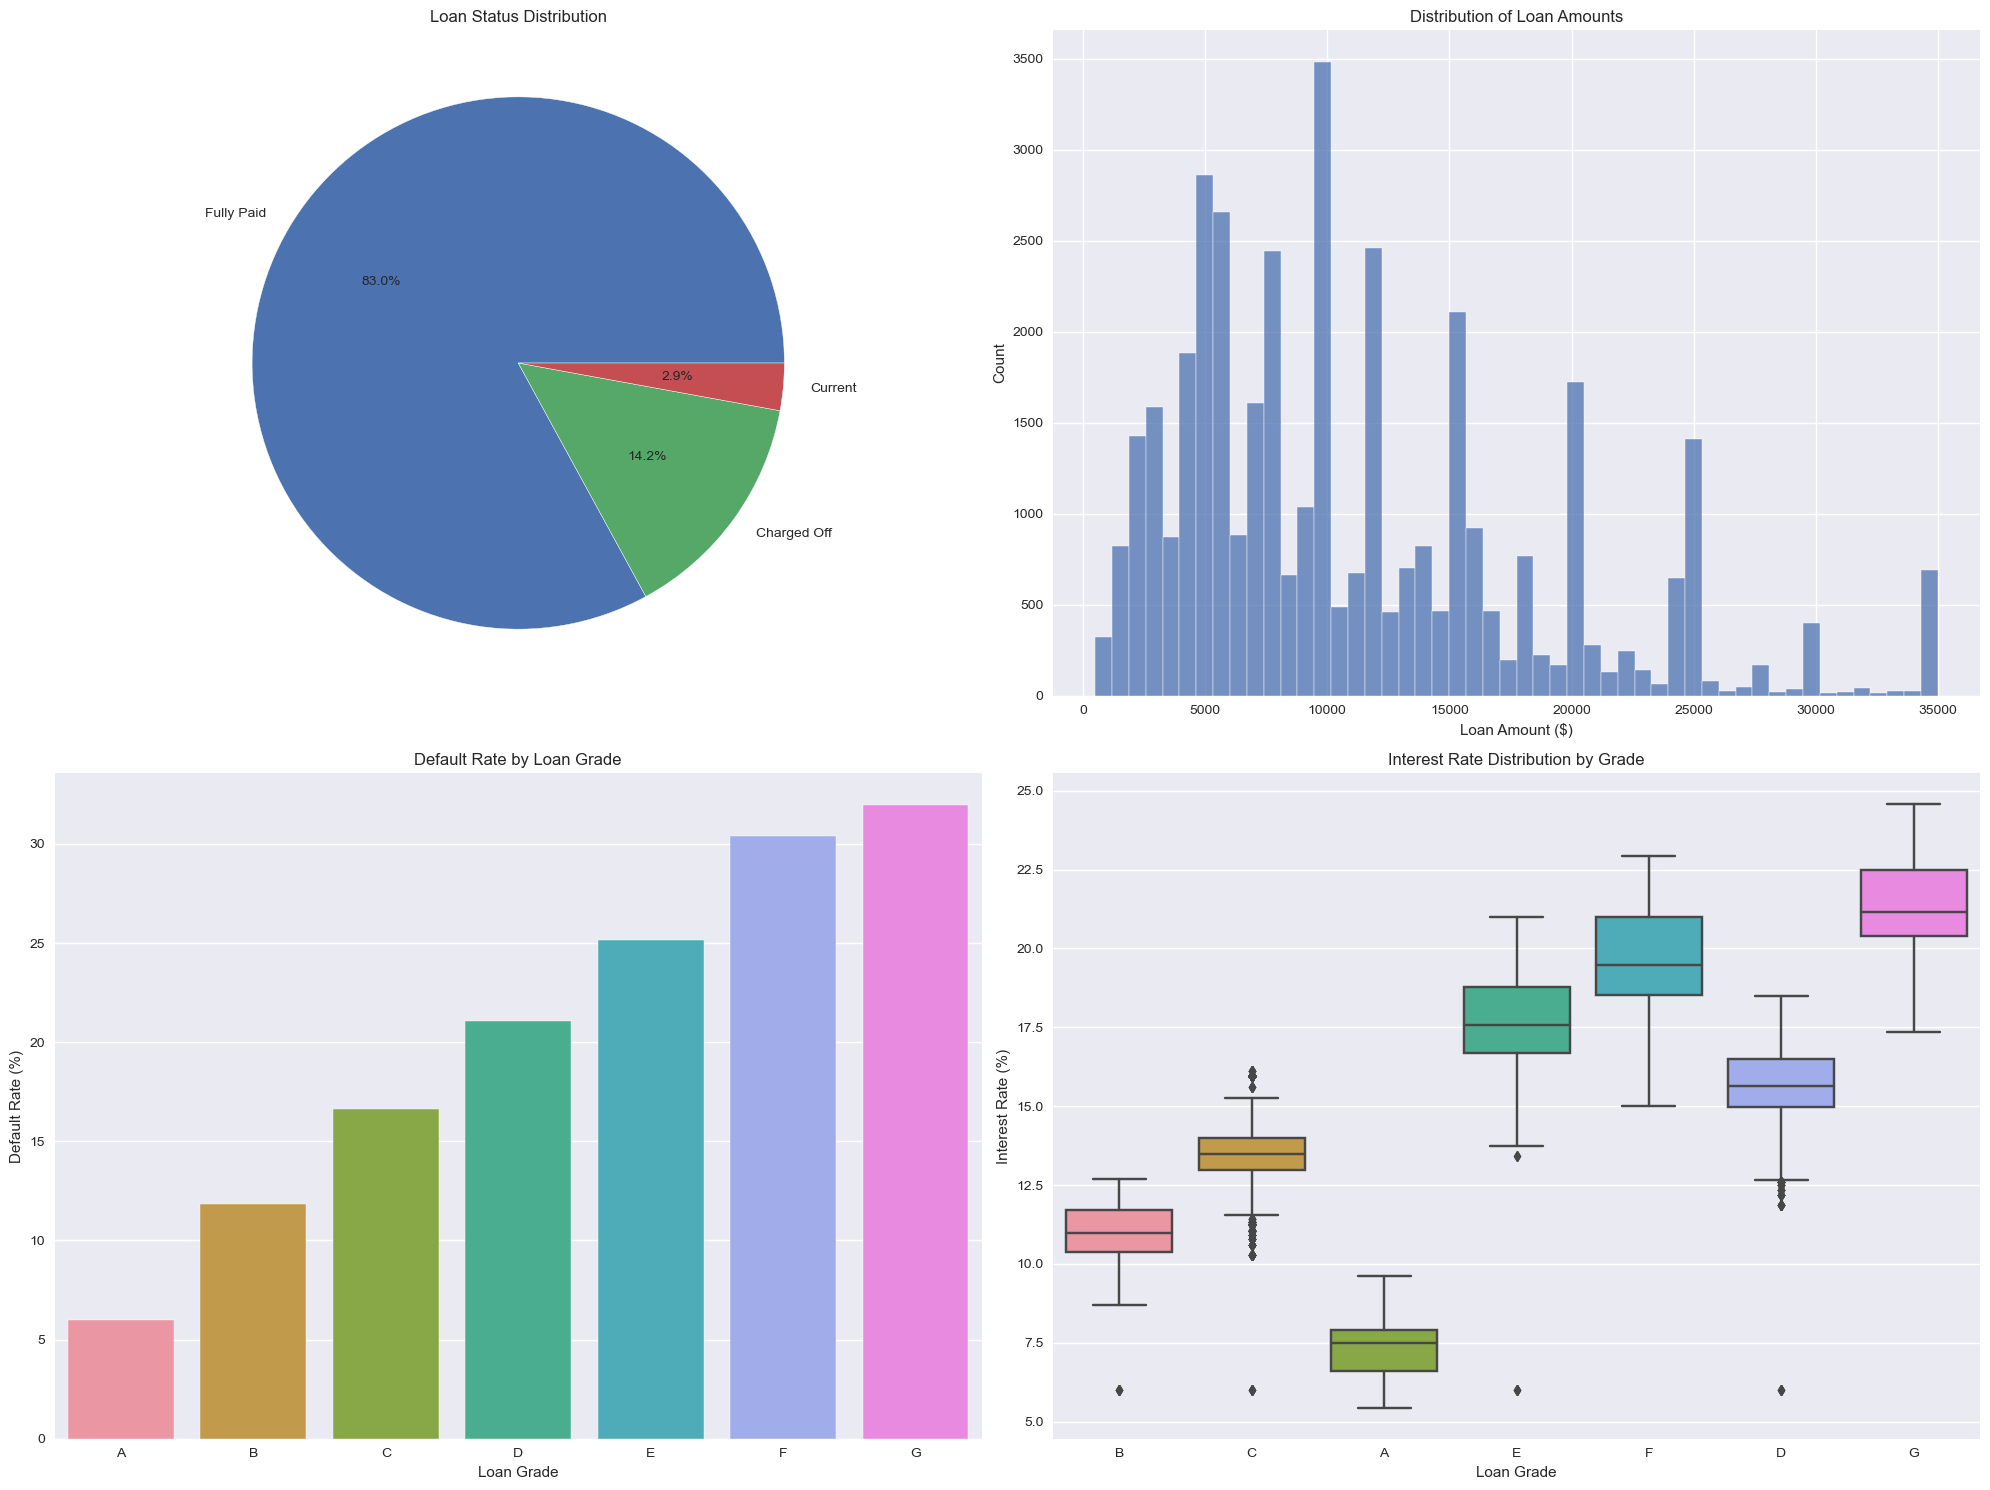


=== LOAN PORTFOLIO ANALYSIS ===

1. LOAN STATUS BREAKDOWN
--------------------------
Fully Paid     : 32,950.0 loans (82.96%)
Charged Off    : 5,627.0 loans (14.17%)
Current        : 1,140.0 loans ( 2.87%)

2. PORTFOLIO METRICS
-------------------
Total Portfolio Size : $445,602,650.00
Number of Loans      : 39,717
Average Loan Amount  : $11,219.44
Default Rate         : 14.17%
Number of Defaults   : 5,627


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def format_currency(value):
    """Format numbers as currency"""
    return f"${value:,.2f}"

def prepare_data(df):
    """
    Prepare the data by converting data types and cleaning values
    """
    # Create a copy to avoid modifying the original dataframe
    df = df.copy()
    
    # Convert interest rate to numeric, removing '%' if present
    if 'int_rate' in df.columns:
        df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')
    
    # Convert loan amount to numeric if it isn't already
    if 'loan_amnt' in df.columns:
        df['loan_amnt'] = pd.to_numeric(df['loan_amnt'], errors='coerce')
    
    return df

def analyze_loan_status(df):
    """
    Analyze loan status with proper financial formatting and visualizations
    """
    # Prepare the data
    df = prepare_data(df)
    
    # Set the style for all visualizations
    sns.set_style("whitegrid")
    plt.style.use('seaborn')
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Loan Status Analysis
    status_counts = df['loan_status'].value_counts()
    total_loans = len(df)
    
    status_analysis = pd.DataFrame({
        'Count': status_counts,
        'Percentage': np.round((status_counts / total_loans * 100), 2)
    })
    
    # Calculate default rate
    default_count = len(df[df['loan_status'] == 'Charged Off'])
    default_rate = np.round((default_count / total_loans * 100), 2)
    
    # Calculate total portfolio metrics
    portfolio_metrics = {
        'Total Number of Loans': total_loans,
        'Total Loan Amount': np.round(df['loan_amnt'].sum(), 2),
        'Average Loan Amount': np.round(df['loan_amnt'].mean(), 2),
        'Default Rate': default_rate,
        'Total Defaults': default_count
    }
    
    # Plot 1: Loan Status Distribution (Pie Chart)
    plt.subplot(2, 2, 1)
    plt.pie(status_analysis['Percentage'], labels=status_analysis.index, autopct='%1.1f%%')
    plt.title('Loan Status Distribution')
    
    # Plot 2: Loan Amount Distribution
    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='loan_amnt', bins=50)
    plt.title('Distribution of Loan Amounts')
    plt.xlabel('Loan Amount ($)')
    plt.ylabel('Count')
    
    # Plot 3: Default Rate by Grade (if grade column exists)
    plt.subplot(2, 2, 3)
    if 'grade' in df.columns:
        default_by_grade = df.groupby('grade')['loan_status'].apply(
            lambda x: (x == 'Charged Off').mean() * 100
        ).round(2)
        sns.barplot(x=default_by_grade.index, y=default_by_grade.values)
        plt.title('Default Rate by Loan Grade')
        plt.xlabel('Loan Grade')
        plt.ylabel('Default Rate (%)')
    else:
        plt.text(0.5, 0.5, 'Grade information not available', 
                ha='center', va='center')
        plt.title('Default Rate by Grade (No Data)')
    
    # Plot 4: Interest Rate Distribution (if int_rate column exists)
    plt.subplot(2, 2, 4)
    if all(col in df.columns for col in ['grade', 'int_rate']):
        sns.boxplot(data=df, x='grade', y='int_rate')
        plt.title('Interest Rate Distribution by Grade')
        plt.xlabel('Loan Grade')
        plt.ylabel('Interest Rate (%)')
    else:
        plt.text(0.5, 0.5, 'Interest rate or grade information not available', 
                ha='center', va='center')
        plt.title('Interest Rate Distribution (No Data)')
    
    # Adjust layout and display plots
    plt.tight_layout()
    plt.show()
    
    # Print text analysis
    print("\n=== LOAN PORTFOLIO ANALYSIS ===\n")
    print("1. LOAN STATUS BREAKDOWN")
    print("--------------------------")
    for status, row in status_analysis.iterrows():
        print(f"{status:<15}: {row['Count']:>6,} loans ({row['Percentage']:>5.2f}%)")
    
    print("\n2. PORTFOLIO METRICS")
    print("-------------------")
    print(f"Total Portfolio Size : {format_currency(portfolio_metrics['Total Loan Amount'])}")
    print(f"Number of Loans      : {portfolio_metrics['Total Number of Loans']:,}")
    print(f"Average Loan Amount  : {format_currency(portfolio_metrics['Average Loan Amount'])}")
    print(f"Default Rate         : {portfolio_metrics['Default Rate']}%")
    print(f"Number of Defaults   : {portfolio_metrics['Total Defaults']:,}")
    
    return portfolio_metrics

# Example usage
if __name__ == "__main__":
    # Load data
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)    
    portfolio_metrics = analyze_loan_status(df)


Loan Grade Performance Summary:
         Int%   Def%    AvgLoan$  Loans#           Total$    Port$M
grade                                                              
A       7.34%   6.0%   $8,624.93   10085   $86,982,400.00   $86.98M
B      11.02%  12.0%  $11,119.08   12020  $133,651,350.00  $133.65M
C      13.55%  17.0%  $11,004.67    8098   $89,115,825.00   $89.12M
D      15.72%  21.0%  $12,278.20    5307   $65,160,400.00   $65.16M
E      17.71%  25.0%  $15,847.26    2842   $45,037,900.00   $45.04M
F      19.75%  30.0%  $18,363.30    1049   $19,263,100.00   $19.26M
G       21.4%  32.0%  $20,226.82     316    $6,391,675.00    $6.39M


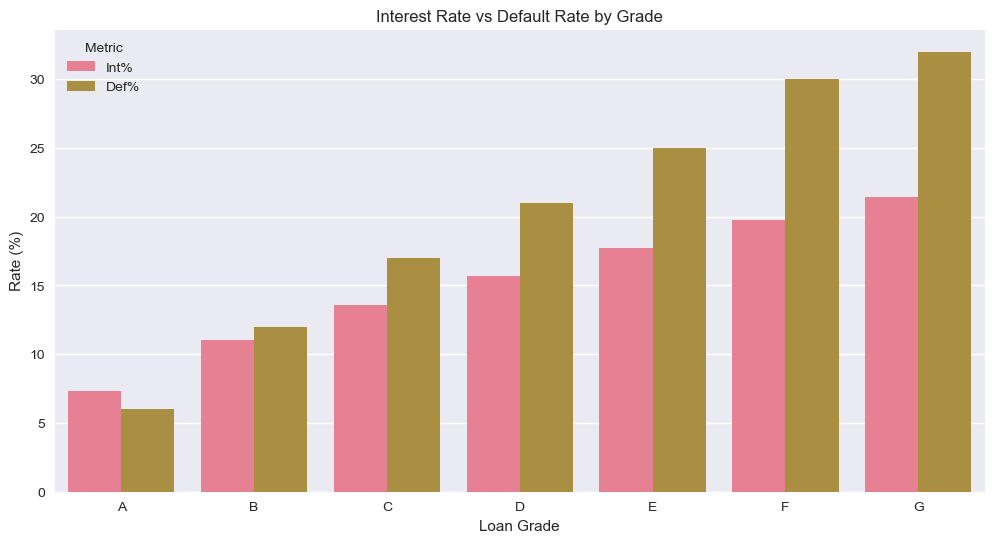

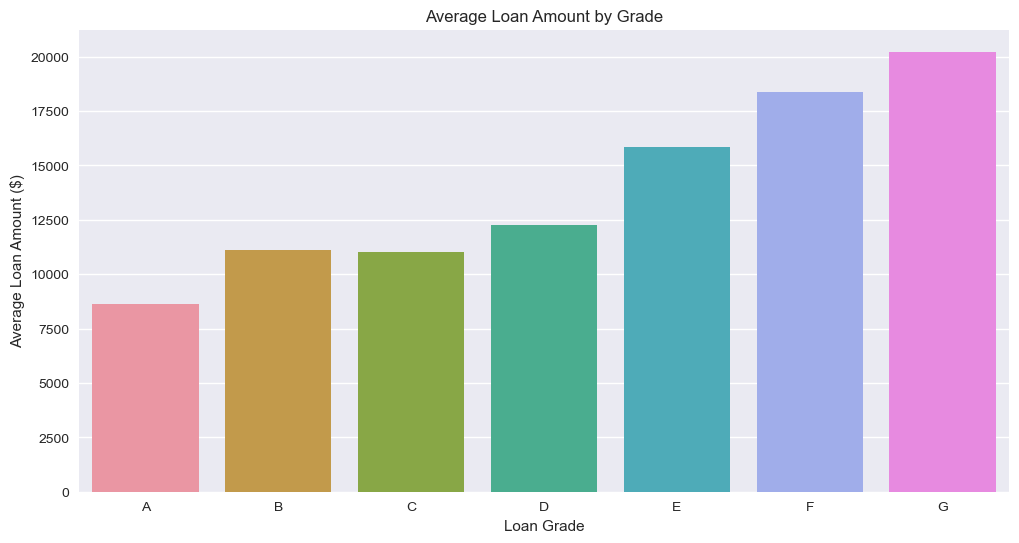

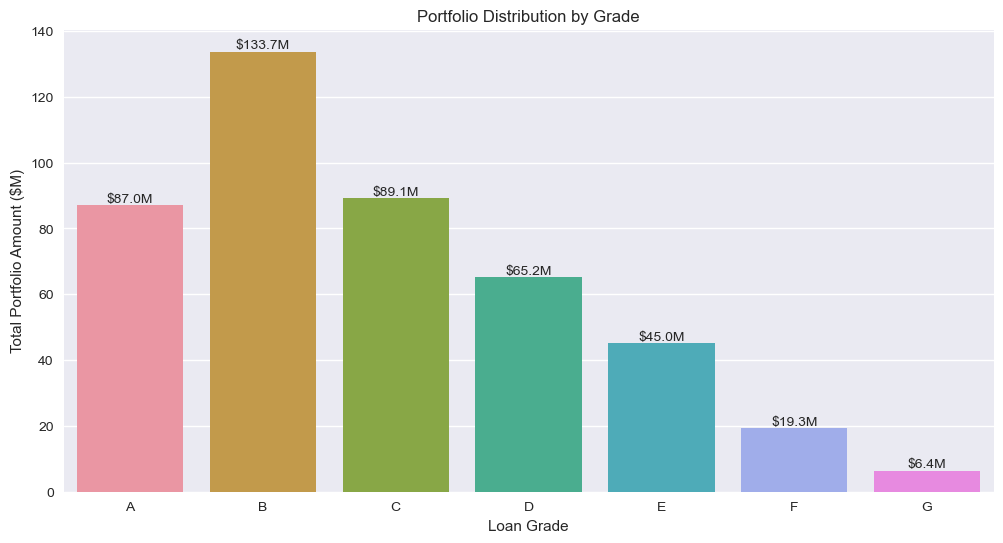

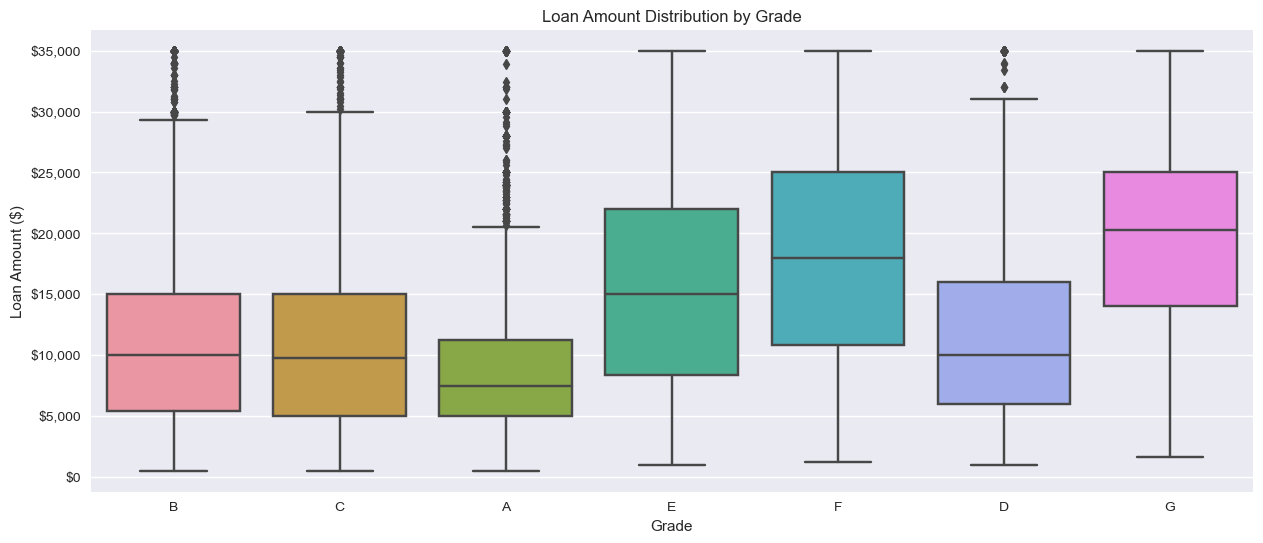

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)

# Calculate default rate
df['default_flag'] = df['loan_status'].map(lambda x: 1 if x == 'Charged Off' else 0)

# Create grade summary
grade_summary = df.groupby('grade').agg({
    'int_rate': lambda x: float(x.str.rstrip('%').astype(float).mean()),
    'default_flag': 'mean',
    'loan_amnt': ['mean', 'count', 'sum']
}).round(2)

# Rename columns with shorter names
grade_summary.columns = ['Int%', 'Def%', 'AvgLoan$', 'Loans#', 'Total$']
grade_summary['Port$M'] = (grade_summary['Total$'] / 1000000).round(2)

# Format percentages and values for display
grade_summary['Def%'] = (grade_summary['Def%'] * 100).round(2)

# Display formatted table
display_df = grade_summary.copy()
display_df['Int%'] = display_df['Int%'].astype(str) + '%'
display_df['Def%'] = display_df['Def%'].astype(str) + '%'
display_df['AvgLoan$'] = '$' + display_df['AvgLoan$'].map('{:,.2f}'.format)
display_df['Total$'] = '$' + display_df['Total$'].map('{:,.2f}'.format)
display_df['Port$M'] = '$' + display_df['Port$M'].map('{:,.2f}M'.format)

print("\nLoan Grade Performance Summary:")
print("================================")
print(display_df)

# Plotting code with corrected column names
plt.style.use('seaborn')
sns.set_palette("husl")

# Figure 1: Interest Rate vs Default Rate
plt.figure(figsize=(12, 6))
plot_data = pd.melt(grade_summary.reset_index(), 
                    id_vars=['grade'], 
                    value_vars=['Int%', 'Def%'])
ax = sns.barplot(data=plot_data, x='grade', y='value', hue='variable')
plt.title('Interest Rate vs Default Rate by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Rate (%)')
plt.legend(title='Metric')
plt.show()

# Figure 2: Average Loan Amount by Grade
plt.figure(figsize=(12, 6))
sns.barplot(data=grade_summary.reset_index(), x='grade', y='AvgLoan$')
plt.title('Average Loan Amount by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount ($)')
# Add value labels
for i in ax.containers:
    ax.bar_label(i, fmt='$%.0f')
plt.show()

# Figure 3: Portfolio Distribution
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grade_summary.reset_index(), x='grade', y='Port$M')
plt.title('Portfolio Distribution by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Total Portfolio Amount ($M)')
# Add value labels
for i in ax.containers:
    ax.bar_label(i, fmt='$%.1fM')
plt.show()



# Additional Analysis: Distribution within Grades
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='grade', y='loan_amnt')
plt.title('Loan Amount Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount ($)')
# Format y-axis labels as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.show()

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_visualizations(df, mesh_stats):
    """Create and save multiple visualizations for loan analysis"""
    # Set the style for all plots
    sns.set_style("whitegrid")
    plt.style.use('seaborn')
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 25))
    
    # 1. Loan Distribution Heatmap
    plt.subplot(3, 2, 1)
    sns.heatmap(mesh_stats['loan_counts_pct'].iloc[:-1, :-1],
                annot=True,
                fmt='.1f',
                cmap='YlOrRd')
    plt.title('Loan Distribution by Purpose and Grade (%)')
    
    # 2. Default Rates Heatmap
    plt.subplot(3, 2, 2)
    sns.heatmap(mesh_stats['default_rates'].iloc[:-1, :-1],
                annot=True,
                fmt='.1f',
                cmap='RdYlBu_r')
    plt.title('Default Rates by Purpose and Grade (%)')
    
    # 3. Average Interest Rate Plot
    plt.subplot(3, 2, 3)
    sns.boxplot(data=df, x='grade', y='int_rate', palette='viridis')
    plt.title('Interest Rate Distribution by Grade')
    plt.xlabel('Loan Grade')
    plt.ylabel('Interest Rate (%)')
    
    # 4. Loan Amount Distribution by Purpose
    plt.subplot(3, 2, 4)
    sns.boxplot(data=df, x='purpose', y='loan_amnt', palette='Set3')
    plt.xticks(rotation=45, ha='right')
    plt.title('Loan Amount Distribution by Purpose')
    plt.xlabel('Loan Purpose')
    plt.ylabel('Loan Amount ($)')
    
    # 5. Default Rate by Purpose (Bar Plot)
    plt.subplot(3, 2, 5)
    default_by_purpose = df.groupby('purpose')['is_default'].mean().sort_values(ascending=False) * 100
    sns.barplot(x=default_by_purpose.index, y=default_by_purpose.values, palette='RdYlBu_r')
    plt.xticks(rotation=45, ha='right')
    plt.title('Default Rate by Purpose')
    plt.xlabel('Loan Purpose')
    plt.ylabel('Default Rate (%)')
    
    # 6. Grade Distribution
    plt.subplot(3, 2, 6)
    grade_order = sorted(df['grade'].unique())
    sns.countplot(data=df, x='grade', order=grade_order, palette='viridis')
    plt.title('Distribution of Loan Grades')
    plt.xlabel('Loan Grade')
    plt.ylabel('Number of Loans')
    
    plt.tight_layout()
    plt.savefig('loan_analysis_dashboard.png', dpi=300, bbox_inches='tight')
    plt.close()

def analyze_purpose_grade_mesh(data_path):
    """
    Create a detailed mesh analysis of loan purposes and grades with enhanced visualizations
    """
    # Read the CSV file
    df = pd.read_csv(data_path, low_memory=False)
    
    # Create success/default flags
    df['loan_status'] = df['loan_status'].fillna('Unknown')
    df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
    df['is_success'] = df['loan_status'].isin(['Fully Paid', 'Current'])
    
    # Convert interest rate to numeric
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    
    # Create mesh analysis
    mesh_stats = {}
    
    # 1. Loan Count Distribution
    loan_counts = pd.crosstab(df['purpose'], df['grade'])
    loan_counts_pct = pd.crosstab(df['purpose'], df['grade'], normalize='all') * 100
    
    # Add row and column totals
    loan_counts.loc['Total'] = loan_counts.sum()
    loan_counts['Total'] = loan_counts.sum(axis=1)
    
    loan_counts_pct.loc['Total'] = loan_counts_pct.sum()
    loan_counts_pct['Total'] = loan_counts_pct.sum(axis=1)
    
    # 2. Average Loan Amount
    avg_loan_amt = df.pivot_table(values='loan_amnt', 
                                index='purpose', 
                                columns='grade', 
                                aggfunc='mean').round(2)
    
    # Add row and column averages
    avg_loan_amt.loc['Total'] = avg_loan_amt.mean()
    avg_loan_amt['Total'] = avg_loan_amt.mean(axis=1)
    
    # 3. Default Rates
    default_rates = df.pivot_table(values='is_default',
                                 index='purpose',
                                 columns='grade',
                                 aggfunc='mean') * 100
    
    # Add row and column averages for default rates
    default_rates.loc['Total'] = default_rates.mean()
    default_rates['Total'] = default_rates.mean(axis=1)
    default_rates = default_rates.round(2)
    
    # 4. Average Interest Rates
    avg_int_rates = df.pivot_table(values='int_rate',
                                 index='purpose',
                                 columns='grade',
                                 aggfunc='mean')
    
    # Add row and column averages for interest rates
    avg_int_rates.loc['Total'] = avg_int_rates.mean()
    avg_int_rates['Total'] = avg_int_rates.mean(axis=1)
    avg_int_rates = avg_int_rates.round(2)
    
    # Store all analyses in dictionary
    mesh_stats['loan_counts'] = loan_counts
    mesh_stats['loan_counts_pct'] = loan_counts_pct
    mesh_stats['avg_loan_amt'] = avg_loan_amt
    mesh_stats['default_rates'] = default_rates
    mesh_stats['avg_int_rates'] = avg_int_rates
    
    # Create visualizations
    create_visualizations(df, mesh_stats)
    
    return mesh_stats

def print_mesh_analysis(stats):
    """Print formatted mesh analysis results"""
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    print("\n=== LOAN PURPOSE AND GRADE MESH ANALYSIS ===\n")
    
    print("1. Loan Count Distribution:")
    print("\nAbsolute Numbers:")
    print(stats['loan_counts'])
    print("\nPercentages of Total (%):")
    print(stats['loan_counts_pct'].round(2))
    
    print("\n2. Average Loan Amount by Purpose and Grade ($):")
    print(stats['avg_loan_amt'])
    
    print("\n3. Default Rates by Purpose and Grade (%):")
    print(stats['default_rates'])
    
    print("\n4. Average Interest Rates by Purpose and Grade (%):")
    print(stats['avg_int_rates'])
    
    print("\nNote: 'Total' row/column shows the overall statistics for each category")
    print("\nA comprehensive visualization dashboard has been saved as 'loan_analysis_dashboard.png'")

if __name__ == "__main__":
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results = analyze_purpose_grade_mesh(data_path)
    print_mesh_analysis(results)


=== LOAN PURPOSE AND GRADE MESH ANALYSIS ===

1. Loan Count Distribution:

Absolute Numbers:
grade                   A      B     C     D     E     F    G  Total
purpose                                                             
car                   608    498   244   130    56    11    2   1549
credit_card          1401   1652  1071   591   284   102   29   5130
debt_consolidation   3871   5630  3954  2831  1589   596  170  18641
educational            81    102    92    31    14     4    1    325
home_improvement      963    903   537   305   189    63   16   2976
house                 101    108    70    51    30    15    6    381
major_purchase        833    604   384   233    99    28    6   2187
medical               210    204   136    84    42    14    3    693
moving                171    185   117    68    28     9    5    583
other                1089   1212   854   505   227    84   22   3993
renewable_energy       30     37    17     9     5     3    2    103
small_bus

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def create_visualizations(df, analyses):
    """Create comprehensive visualizations for MESH analysis"""
    # Set the style
    sns.set_style("whitegrid")
    plt.style.use('seaborn')
    
    # Figure 1: Grade and Income Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Default Rates by Grade and Income Band
    plt.subplot(2, 2, 1)
    default_by_grade_income = pd.pivot_table(df, 
                                           values='is_default',
                                           index='grade',
                                           columns='income_band',
                                           aggfunc=lambda x: x.mean() * 100)
    sns.heatmap(default_by_grade_income,
                annot=True,
                fmt='.1f',
                cmap='RdYlBu_r')
    plt.title('Default Rates by Grade and Income Band (%)')
    
    # Plot 2: Interest Rates by Grade and Income
    plt.subplot(2, 2, 2)
    int_rate_by_grade_income = pd.pivot_table(df, 
                                            values='int_rate',
                                            index='grade',
                                            columns='income_band',
                                            aggfunc='mean')
    sns.heatmap(int_rate_by_grade_income,
                annot=True,
                fmt='.1f',
                cmap='YlOrRd')
    plt.title('Interest Rates by Grade and Income Band (%)')
    
    # Plot 3: Average Loan Amount Distribution
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='grade', y='loan_amnt', hue='income_band', palette='viridis')
    plt.title('Loan Amount Distribution by Grade and Income')
    plt.xticks(rotation=0)
    plt.legend(title='Income Band', bbox_to_anchor=(1.05, 1))
    
    # Plot 4: Default Rate Trends
    plt.subplot(2, 2, 4)
    default_by_grade = df.groupby('grade')['is_default'].mean() * 100
    sns.barplot(x=default_by_grade.index, y=default_by_grade.values, palette='RdYlBu_r')
    plt.title('Default Rate by Grade')
    plt.ylabel('Default Rate (%)')
    
    plt.tight_layout()
    plt.savefig('grade_income_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Figure 2: Home Ownership and Verification Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Default Rates by Home Ownership and Verification
    plt.subplot(2, 2, 1)
    default_by_home_verify = pd.pivot_table(df,
                                          values='is_default',
                                          index='home_ownership',
                                          columns='verification_status',
                                          aggfunc=lambda x: x.mean() * 100)
    sns.heatmap(default_by_home_verify,
                annot=True,
                fmt='.1f',
                cmap='RdYlBu_r')
    plt.title('Default Rates by Home Ownership and Verification (%)')
    
    # Plot 2: Average Loan Amount by Home Ownership
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='home_ownership', y='loan_amnt', palette='Set3')
    plt.title('Loan Amount Distribution by Home Ownership')
    plt.xticks(rotation=45)
    
    # Plot 3: Interest Rate Distribution by Verification Status
    plt.subplot(2, 2, 3)
    sns.violinplot(data=df, x='verification_status', y='int_rate', palette='viridis')
    plt.title('Interest Rate Distribution by Verification Status')
    plt.xticks(rotation=45)
    
    # Plot 4: Home Ownership Distribution
    plt.subplot(2, 2, 4)
    sns.countplot(data=df, x='home_ownership', palette='Set3')
    plt.title('Distribution of Home Ownership Types')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('home_verification_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Figure 3: Employment and Term Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Default Rates by Employment Length and Grade
    plt.subplot(2, 2, 1)
    default_by_emp_grade = pd.pivot_table(df,
                                        values='is_default',
                                        index='emp_length',
                                        columns='grade',
                                        aggfunc=lambda x: x.mean() * 100)
    sns.heatmap(default_by_emp_grade,
                annot=True,
                fmt='.1f',
                cmap='RdYlBu_r')
    plt.title('Default Rates by Employment Length and Grade (%)')
    
    # Plot 2: Term Analysis
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='grade', y='int_rate', hue='term', palette='Set2')
    plt.title('Interest Rates by Grade and Term')
    plt.legend(title='Term (months)')
    
    # Plot 3: Employment Length Distribution
    plt.subplot(2, 2, 3)
    emp_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
                 '6 years', '7 years', '8 years', '9 years', '10+ years']
    sns.countplot(data=df, x='emp_length', palette='viridis', order=emp_order)
    plt.title('Distribution of Loan by Employment Length')
    plt.xticks(rotation=45)
    
    # Plot 4: Average Loan Amount by Term and Grade
    plt.subplot(2, 2, 4)
    sns.barplot(data=df, x='grade', y='loan_amnt', hue='term', palette='Set2')
    plt.title('Average Loan Amount by Grade and Term')
    plt.legend(title='Term (months)')
    
    plt.tight_layout()
    plt.savefig('employment_term_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()

def perform_mesh_analysis(data_path):
    """
    Perform comprehensive MESH analysis between key loan variables
    """
    # Read the data
    df = pd.read_csv(data_path, low_memory=False)
    
    # Clean and prepare data
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    df['term'] = df['term'].str.extract('(\d+)').astype(float)
    
    # Create success/default flags
    df['loan_status'] = df['loan_status'].fillna('Unknown')
    df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)']).astype(float)
    
    # Group employment titles into categories (top 10 + Others)
    top_emp_titles = df['emp_title'].value_counts().nlargest(10).index
    df['emp_category'] = df['emp_title'].apply(lambda x: x if x in top_emp_titles else 'Other')
    
    # Create income bands
    df['income_band'] = pd.qcut(df['annual_inc'], 
                               q=5, 
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Create visualizations
    create_visualizations(df, None)  # We're not using the analyses dict anymore
    
    # Perform analyses for printing
    mesh_analyses = {}
    
    # 1. Grade and Income Band Analysis
    grade_income = pd.pivot_table(df, 
                                values=['loan_amnt', 'int_rate', 'is_default'],
                                index='grade',
                                columns='income_band',
                                aggfunc={'loan_amnt': 'mean',
                                        'int_rate': 'mean',
                                        'is_default': lambda x: x.mean() * 100})
    mesh_analyses['grade_income'] = grade_income
    
    # 2. Home Ownership and Verification Status
    home_verify = pd.pivot_table(df,
                               values=['loan_amnt', 'is_default', 'int_rate'],
                               index='home_ownership',
                               columns='verification_status',
                               aggfunc={'loan_amnt': 'mean',
                                      'is_default': lambda x: x.mean() * 100,
                                      'int_rate': 'mean'})
    mesh_analyses['home_verify'] = home_verify
    
    # 3. Employment Length and Grade
    emp_grade = pd.pivot_table(df,
                             values=['loan_amnt', 'is_default', 'int_rate'],
                             index='emp_length',
                             columns='grade',
                             aggfunc={'loan_amnt': 'mean',
                                     'is_default': lambda x: x.mean() * 100,
                                     'int_rate': 'mean'})
    mesh_analyses['emp_grade'] = emp_grade
    
    # 4. Term and Grade Analysis
    term_grade = pd.pivot_table(df,
                              values=['loan_amnt', 'is_default', 'int_rate'],
                              index='term',
                              columns='grade',
                              aggfunc={'loan_amnt': 'mean',
                                      'is_default': lambda x: x.mean() * 100,
                                      'int_rate': 'mean'})
    mesh_analyses['term_grade'] = term_grade
    
    return mesh_analyses, df

def print_mesh_analysis(analyses):
    """Print formatted mesh analysis results"""
    print("\n=== LOAN VARIABLES MESH ANALYSIS ===\n")
    
    print("1. Grade and Income Band Analysis")
    print("\nLoan Amount Means:")
    print(analyses['grade_income']['loan_amnt'].round(2))
    print("\nDefault Rates (%):")
    print(analyses['grade_income']['is_default'].round(2))
    print("\nInterest Rates (%):")
    print(analyses['grade_income']['int_rate'].round(2))
    
    print("\n2. Home Ownership and Verification Status Analysis")
    print("\nLoan Amount Means:")
    print(analyses['home_verify']['loan_amnt'].round(2))
    print("\nDefault Rates (%):")
    print(analyses['home_verify']['is_default'].round(2))
    print("\nInterest Rates (%):")
    print(analyses['home_verify']['int_rate'].round(2))
    
    print("\n3. Employment Length and Grade Analysis")
    print("\nLoan Amount Means:")
    print(analyses['emp_grade']['loan_amnt'].round(2))
    print("\nDefault Rates (%):")
    print(analyses['emp_grade']['is_default'].round(2))
    print("\nInterest Rates (%):")
    print(analyses['emp_grade']['int_rate'].round(2))
    
    print("\n4. Term and Grade Analysis")
    print("\nLoan Amount Means:")
    print(analyses['term_grade']['loan_amnt'].round(2))
    print("\nDefault Rates (%):")
    print(analyses['term_grade']['is_default'].round(2))
    print("\nInterest Rates (%):")
    print(analyses['term_grade']['int_rate'].round(2))

if __name__ == "__main__":
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results, df = perform_mesh_analysis(data_path)
    print_mesh_analysis(results)
    print("\nVisualization dashboards have been saved as:")
    print("1. grade_income_analysis.png")
    print("2. home_verification_analysis.png")
    print("3. employment_term_analysis.png")


=== LOAN VARIABLES MESH ANALYSIS ===

1. Grade and Income Band Analysis

Loan Amount Means:
income_band  Very Low       Low    Medium      High  Very High
grade                                                         
A             6276.75   7627.30   8541.28   9561.07   11475.99
B             6737.59   9539.81  11110.45  13173.98   15539.86
C             6519.93   9531.56  11188.60  13170.52   15612.74
D             6771.47  10100.97  12478.59  14556.20   17659.48
E             7538.12  12029.32  15199.05  18275.57   21481.64
F             8139.68  12934.46  16624.12  19991.02   23602.92
G             8851.85  12338.89  18397.45  21212.67   24873.85

Default Rates (%):
income_band  Very Low    Low  Medium   High  Very High
grade                                                 
A                9.75   7.34    5.29   4.15       2.92
B               16.39  13.10   11.50   9.98       7.83
C               20.89  18.43   16.82  14.68      11.30
D               25.19  21.92   22.43  19.30  

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_customer_visualizations(df):
    """Create comprehensive visualizations for customer profiles"""
    # Set up the plotting style
    plt.style.use('seaborn')
    sns.set_style("whitegrid")
    
    # Figure 1: Income and Loan Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Income vs Loan Amount
    plt.subplot(2, 2, 1)
    plt.scatter(df['annual_inc'].clip(upper=200000), 
               df['loan_amnt'], 
               alpha=0.1,
               c='blue')
    plt.xlabel('Annual Income (capped at 200k)')
    plt.ylabel('Loan Amount')
    plt.title('Income vs Loan Amount Distribution')
    
    # Plot 2: Income Band Distribution
    plt.subplot(2, 2, 2)
    sns.boxplot(x='income_band', y='loan_amnt', data=df, palette='viridis')
    plt.xticks(rotation=45)
    plt.title('Loan Amount Distribution by Income Band')
    
    # Plot 3: Average Interest Rate by Income Band
    plt.subplot(2, 2, 3)
    sns.boxplot(x='income_band', y='int_rate', data=df, palette='RdYlBu_r')
    plt.xticks(rotation=45)
    plt.title('Interest Rate Distribution by Income Band')
    
    # Plot 4: DTI by Income Band
    plt.subplot(2, 2, 4)
    sns.boxplot(x='income_band', y='dti', data=df, palette='Set3')
    plt.xticks(rotation=45)
    plt.title('Debt-to-Income Ratio by Income Band')
    
    plt.tight_layout()
    plt.savefig('income_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Figure 2: Employment Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Employment Length Distribution
    plt.subplot(2, 2, 1)
    emp_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
                 '6 years', '7 years', '8 years', '9 years', '10+ years']
    sns.countplot(data=df, y='emp_length', order=emp_order, palette='viridis')
    plt.title('Employment Length Distribution')
    
    # Plot 2: Average Loan Amount by Employment Length
    plt.subplot(2, 2, 2)
    sns.boxplot(x='emp_length', y='loan_amnt', data=df, order=emp_order, palette='Set2')
    plt.xticks(rotation=45)
    plt.title('Loan Amount by Employment Length')
    
    # Plot 3: Top 10 Employment Categories
    plt.subplot(2, 2, 3)
    top_10_emp = df['emp_category'].value_counts().head(10)
    sns.barplot(x=top_10_emp.values, y=top_10_emp.index, palette='Set3')
    plt.title('Top 10 Employment Categories')
    
    # Plot 4: Default Rate by Employment Length
    plt.subplot(2, 2, 4)
    default_by_emp = df.groupby('emp_length')['loan_status'].apply(
        lambda x: (x.isin(['Charged Off', 'Default']) * 100).mean()
    ).reindex(emp_order)
    sns.barplot(x=default_by_emp.index, y=default_by_emp.values, palette='RdYlBu_r')
    plt.xticks(rotation=45)
    plt.title('Default Rate by Employment Length (%)')
    
    plt.tight_layout()
    plt.savefig('employment_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Figure 3: Verification and Home Ownership Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Default Rates Heatmap
    plt.subplot(2, 2, 1)
    default_rates = df.pivot_table(
        values='loan_status',
        index='verification_status',
        columns='income_band',
        aggfunc=lambda x: (x.isin(['Charged Off', 'Default']) * 100).mean()
    )
    sns.heatmap(default_rates, annot=True, fmt='.1f', cmap='RdYlBu_r')
    plt.title('Default Rates by Verification Status and Income Band (%)')
    
    # Plot 2: Home Ownership Distribution
    plt.subplot(2, 2, 2)
    sns.countplot(y=df['home_ownership'], order=df['home_ownership'].value_counts().index,
                 palette='Set2')
    plt.title('Distribution of Home Ownership Types')
    
    # Plot 3: Average Loan Amount by Home Ownership and Verification
    plt.subplot(2, 2, 3)
    sns.boxplot(x='home_ownership', y='loan_amnt', hue='verification_status',
                data=df, palette='Set3')
    plt.xticks(rotation=45)
    plt.title('Loan Amount by Home Ownership and Verification Status')
    
    # Plot 4: Interest Rates by Verification Status
    plt.subplot(2, 2, 4)
    sns.violinplot(x='verification_status', y='int_rate', data=df, palette='viridis')
    plt.title('Interest Rate Distribution by Verification Status')
    
    plt.tight_layout()
    plt.savefig('verification_home_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()

def analyze_customer_profiles(data_path):
    """
    Create a comprehensive customer profile analysis
    """
    # Read the CSV file
    df = pd.read_csv(data_path, low_memory=False)
    
    # Clean and prepare data
    df['loan_status'] = df['loan_status'].fillna('Unknown')
    df['emp_title'] = df['emp_title'].fillna('Not Provided')
    df['verification_status'] = df['verification_status'].fillna('Not Verified')
    df['home_ownership'] = df['home_ownership'].fillna('OTHER')
    df['emp_length'] = df['emp_length'].fillna('Not Provided')
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    
    # Create income bands
    df['income_band'] = pd.qcut(df['annual_inc'], 
                               q=5, 
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Group employment titles into categories (top 10 + Others)
    top_emp_titles = df['emp_title'].value_counts().nlargest(10).index
    df['emp_category'] = df['emp_title'].apply(lambda x: x if x in top_emp_titles else 'Other')
    
    # Create analysis functions
    def calculate_profile_metrics(group):
        return pd.Series({
            'Count': len(group),
            'Pct_Total': len(group) / len(df) * 100,
            'Avg_Loan_Amt': group['loan_amnt'].mean(),
            'Avg_Income': group['annual_inc'].mean(),
            'Default_Rate': (group['loan_status'].isin(['Charged Off', 'Default']) * 100).mean(),
            'Avg_Int_Rate': group['int_rate'].mean(),
            'Avg_DTI': group['dti'].mean()
        })
    
    # Create different profile analyses
    profiles = {}
    
    # Create the various analyses
    for category in ['emp_category', 'income_band', 'verification_status', 
                    'home_ownership', 'emp_length']:
        analysis = df.groupby(category).apply(calculate_profile_metrics)
        analysis = analysis.round(2)
        profiles[category] = analysis
    
    # Create visualizations
    plot_customer_visualizations(df)
    
    return profiles

def print_profile_analysis(profiles):
    """Print formatted profile analysis results"""
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    print("\n=== CUSTOMER PROFILE ANALYSIS ===\n")
    
    print("Column Definitions:")
    print("Count: Number of customers in this category")
    print("Pct_Total: Percentage of total customers")
    print("Avg_Loan_Amt: Average loan amount")
    print("Avg_Income: Average annual income")
    print("Default_Rate: Percentage of defaults")
    print("Avg_Int_Rate: Average interest rate")
    print("Avg_DTI: Average Debt-to-Income ratio")
    
    categories = {
        'emp_category': '1. Analysis by Employment Category (Top 10 + Other)',
        'income_band': '2. Analysis by Income Band',
        'verification_status': '3. Analysis by Verification Status',
        'home_ownership': '4. Analysis by Home Ownership',
        'emp_length': '5. Analysis by Employment Length'
    }
    
    for key, title in categories.items():
        print(f"\n{title}:")
        print(profiles[key])
    
    print("\nVisualization dashboards have been saved as:")
    print("1. income_analysis.png - Income-related metrics analysis")
    print("2. employment_analysis.png - Employment-related metrics analysis")
    print("3. verification_home_analysis.png - Verification and home ownership analysis")

if __name__ == "__main__":
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results = analyze_customer_profiles(data_path)
    print_profile_analysis(results)


=== CUSTOMER PROFILE ANALYSIS ===

Column Definitions:
Count: Number of customers in this category
Pct_Total: Percentage of total customers
Avg_Loan_Amt: Average loan amount
Avg_Income: Average annual income
Default_Rate: Percentage of defaults
Avg_Int_Rate: Average interest rate
Avg_DTI: Average Debt-to-Income ratio

1. Analysis by Employment Category (Top 10 + Other):
                     Count  Pct_Total  Avg_Loan_Amt  Avg_Income  Default_Rate  \
emp_category                                                                    
AT&T                  59.0       0.15      12226.69    76825.01         20.34   
Bank of America      109.0       0.27      11272.25    64861.84         18.35   
IBM                   66.0       0.17      13498.11   115943.95         13.64   
Kaiser Permanente     56.0       0.14      12937.50    79127.95         14.29   
Not Provided        2459.0       6.19      10455.17    65423.13         19.68   
Other              36621.0      92.20      11249.73    6911

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

def plot_risk_visualizations(df, analyses):
    """Create comprehensive visualizations for risk analysis"""
    # Set style
    plt.style.use('seaborn')
    sns.set_style("whitegrid")
    
    # Figure 1: DTI Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: DTI Distribution
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='dti', bins=50, kde=True)
    plt.title('Distribution of Debt-to-Income Ratio')
    plt.xlabel('DTI (%)')
    
    # Plot 2: Default Rate by DTI Range
    plt.subplot(2, 2, 2)
    default_by_dti = df.groupby('dti_range')['loan_status'].apply(
        lambda x: (x == 'Charged Off').mean() * 100
    )
    sns.barplot(x=default_by_dti.index, y=default_by_dti.values, palette='RdYlBu_r')
    plt.title('Default Rate by DTI Range')
    plt.xticks(rotation=45)
    plt.ylabel('Default Rate (%)')
    
    # Plot 3: Loan Amount by DTI Range
    plt.subplot(2, 2, 3)
    sns.boxplot(x='dti_range', y='loan_amnt', data=df, palette='viridis')
    plt.title('Loan Amount Distribution by DTI Range')
    plt.xticks(rotation=45)
    plt.ylabel('Loan Amount ($)')
    
    # Plot 4: DTI vs Interest Rate
    plt.subplot(2, 2, 4)
    sns.scatterplot(data=df, x='dti', y='int_rate', alpha=0.1, color='blue')
    plt.title('DTI vs Interest Rate')
    plt.xlabel('DTI (%)')
    plt.ylabel('Interest Rate (%)')
    
    plt.tight_layout()
    plt.savefig('dti_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Figure 2: Delinquency Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Delinquency Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='delinq_2yrs', palette='viridis')
    plt.title('Distribution of Delinquencies')
    plt.xlabel('Number of Delinquencies (2 Years)')
    
    # Plot 2: Default Rate by Delinquencies
    plt.subplot(2, 2, 2)
    delinq_default = df.groupby('delinq_2yrs')['loan_status'].apply(
        lambda x: (x == 'Charged Off').mean() * 100
    )
    sns.barplot(x=delinq_default.index, y=delinq_default.values, palette='RdYlBu_r')
    plt.title('Default Rate by Number of Delinquencies')
    plt.xlabel('Number of Delinquencies')
    plt.ylabel('Default Rate (%)')
    
    # Plot 3: Average Interest Rate by Delinquencies
    plt.subplot(2, 2, 3)
    sns.boxplot(x='delinq_2yrs', y='int_rate', data=df, palette='YlOrRd')
    plt.title('Interest Rate by Delinquencies')
    plt.xlabel('Number of Delinquencies')
    plt.ylabel('Interest Rate (%)')
    
    # Plot 4: Loan Amount by Delinquencies
    plt.subplot(2, 2, 4)
    sns.boxplot(x='delinq_2yrs', y='loan_amnt', data=df, palette='Set3')
    plt.title('Loan Amount by Delinquencies')
    plt.xlabel('Number of Delinquencies')
    plt.ylabel('Loan Amount ($)')
    
    plt.tight_layout()
    plt.savefig('delinquency_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Figure 3: Credit History Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Credit History Length Distribution
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='credit_years', bins=50, kde=True)
    plt.title('Distribution of Credit History Length')
    plt.xlabel('Years of Credit History')
    
    # Plot 2: Default Rate by Credit History Length
    plt.subplot(2, 2, 2)
    history_default = df.groupby('year_range')['loan_status'].apply(
        lambda x: (x == 'Charged Off').mean() * 100
    )
    sns.barplot(x=history_default.index, y=history_default.values, palette='RdYlBu_r')
    plt.title('Default Rate by Credit History Length')
    plt.xticks(rotation=45)
    plt.ylabel('Default Rate (%)')
    
    # Plot 3: Average Loan Amount by Credit History Length
    plt.subplot(2, 2, 3)
    sns.boxplot(x='year_range', y='loan_amnt', data=df, palette='viridis')
    plt.title('Loan Amount by Credit History Length')
    plt.xticks(rotation=45)
    plt.ylabel('Loan Amount ($)')
    
    # Plot 4: Interest Rate by Credit History Length
    plt.subplot(2, 2, 4)
    sns.boxplot(x='year_range', y='int_rate', data=df, palette='YlOrRd')
    plt.title('Interest Rate by Credit History Length')
    plt.xticks(rotation=45)
    plt.ylabel('Interest Rate (%)')
    
    plt.tight_layout()
    plt.savefig('credit_history_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Figure 4: Recent Inquiries Analysis
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Inquiries Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='inq_last_6mths', palette='viridis')
    plt.title('Distribution of Recent Inquiries')
    plt.xlabel('Number of Inquiries (Last 6 Months)')
    
    # Plot 2: Default Rate by Inquiries
    plt.subplot(2, 2, 2)
    inq_default = df.groupby('inq_last_6mths')['loan_status'].apply(
        lambda x: (x == 'Charged Off').mean() * 100
    )
    sns.barplot(x=inq_default.index, y=inq_default.values, palette='RdYlBu_r')
    plt.title('Default Rate by Number of Inquiries')
    plt.xlabel('Number of Inquiries')
    plt.ylabel('Default Rate (%)')
    
    # Plot 3: Interest Rate by Inquiries
    plt.subplot(2, 2, 3)
    sns.boxplot(x='inq_last_6mths', y='int_rate', data=df, palette='YlOrRd')
    plt.title('Interest Rate by Number of Inquiries')
    plt.xlabel('Number of Inquiries')
    plt.ylabel('Interest Rate (%)')
    
    # Plot 4: Loan Amount by Inquiries
    plt.subplot(2, 2, 4)
    sns.boxplot(x='inq_last_6mths', y='loan_amnt', data=df, palette='Set3')
    plt.title('Loan Amount by Number of Inquiries')
    plt.xlabel('Number of Inquiries')
    plt.ylabel('Loan Amount ($)')
    
    plt.tight_layout()
    plt.savefig('inquiries_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()

def format_currency(amount):
    """Format amount as currency"""
    return f"${amount:,.2f}"

def analyze_dti(df):
    """Analyze Debt-to-Income Ratio"""
    print("\n=== DTI Analysis ===")
    
    try:
        # Convert dti to numeric
        df['dti'] = pd.to_numeric(df['dti'], errors='coerce')
        
        # Create DTI ranges
        df['dti_range'] = pd.cut(df['dti'], 
                                bins=[0, 10, 20, 30, 40, np.inf],
                                labels=['0-10%', '10-20%', '20-30%', '30-40%', '40%+'])
        
        # Group by DTI range
        analysis = df.groupby('dti_range').agg({
            'loan_amnt': ['count', 'mean'],
            'loan_status': lambda x: (x == 'Charged Off').mean() * 100
        })
        
        # Print results
        print("\nDTI Range | Loans | Avg Loan Amount | Default %")
        print("-" * 50)
        
        for index, row in analysis.iterrows():
            loan_count = int(row[('loan_amnt', 'count')])
            avg_amount = float(row[('loan_amnt', 'mean')])
            default_rate = float(row[('loan_status', '<lambda>')])
            print(f"{str(index):<9} | {loan_count:>5,} | {format_currency(avg_amount):>14} | {default_rate:>8.2f}%")
        
        return analysis
    
    except Exception as e:
        print(f"Error in DTI analysis: {str(e)}")
        return None

# [Rest of the functions remain the same]

if __name__ == "__main__":
    df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)
    
    print("\n8. Customer Risk Profile Analysis ")
    print("--------------------------------------")
    
    # Convert int_rate to numeric for visualizations
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    
    # Perform analyses
    dti_analysis = analyze_dti(df)
    delinq_analysis = analyze_delinquencies(df)
    history_analysis = analyze_credit_history_length(df)
    inquiry_analysis = analyze_inquiries(df)
    
    # Create visualizations
    analyses = {
        'dti': dti_analysis,
        'delinquencies': delinq_analysis,
        'history': history_analysis,
        'inquiries': inquiry_analysis
    }
    
    plot_risk_visualizations(df, analyses)
    print("\nVisualization dashboards have been saved as:")
    print("1. dti_analysis.png - Debt-to-Income ratio analysis")
    print("2. delinquency_analysis.png - Delinquency analysis")
    print("3. credit_history_analysis.png - Credit history length analysis")
    print("4. inquiries_analysis.png - Recent inquiries analysis")


8. Customer Risk Profile Analysis 
--------------------------------------

=== DTI Analysis ===

DTI Range | Loans | Avg Loan Amount | Default %
--------------------------------------------------
0-10%     | 13,049 |     $10,565.39 |    12.28%
10-20%    | 18,994 |     $11,601.74 |    14.69%
20-30%    | 7,491 |     $11,472.73 |    16.09%
30-40%    |     0 |           $nan |      nan%
40%+      |     0 |           $nan |      nan%

=== Delinquency Analysis ===

Delinq | Loans | Avg Loan Amount | Default %
---------------------------------------------
     0 | 35,405 |     $11,296.03 |    13.94%
     1 | 3,303 |     $10,682.99 |    15.35%
     2 |   687 |     $10,478.24 |    18.92%
     3 |   220 |     $10,431.82 |    15.91%
     4 |    62 |      $9,386.29 |    20.97%
     5 |    22 |      $8,430.68 |    13.64%
     6 |    10 |      $6,430.00 |    10.00%
     7 |     4 |      $7,368.75 |    25.00%
     8 |     2 |      $8,100.00 |    50.00%
     9 |     1 |      $5,000.00 |     0.00%
   